In [2]:
from obspy.core import Stream, read
import numpy as np
from pytensor.compile.ops import as_op
import pytensor
import pytensor.tensor as pt
import matplotlib.pyplot as plt
import pandas as pd
import os 
import os.path
import pymc as pm
import arviz as az

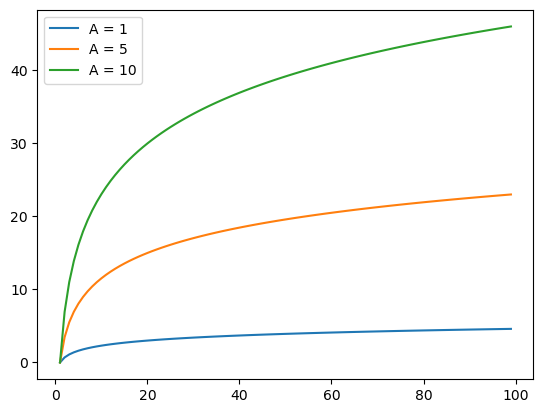

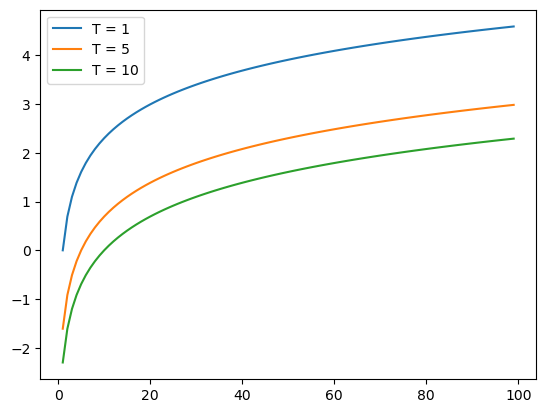

In [15]:
# Simple log function

x = np.arange(1,100,1)
A = [1,5,10]
T = 1

for idx in range(len(A)):
    y = A[idx] * np.log(x/T)
    plt.plot(x, y, label = 'A = ' + str(A[idx]))
    plt.legend()
plt.show()

A = 1
T = [1,5,10]

for idx in range(len(T)):
    y = A * np.log(x/T[idx])
    plt.plot(x, y, label = 'T = ' + str(T[idx]))
    plt.legend()
plt.show()

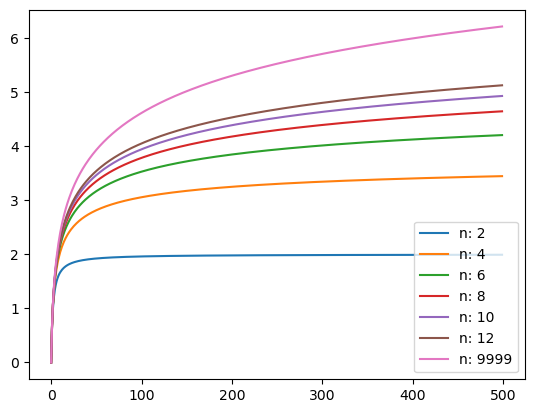

In [95]:
# Montesi power law function, equation 11b

# If the displacement history of the shear zone obeys equation (11b), 
# the GPS signal, which is linearly related to shear zone displacement, 
# follows equation (11b) as well, albeit with modified intensity. 
# In other words, D0 and V0 are modified, but 1/n and τ are preserved. 
# Hence it is possible to invert the GPS signal using equation (11b) to yield an apparent value of 1/n and τ, 
# which may have direct implications for the rheology of the shear zone.

V0 = 1
tau = 1
ns = [2, 4, 6, 8, 10, 12, 9999]
t = np.arange(0,500,1)

for i in range(len(ns)):
    n = ns[i]
    delta = V0 * tau * n * (1 - (1 + (1 - (1/n)) * t/tau)**(1/(1-n)))
    plt.plot(t, delta, label = 'n: ' + str(n))
    plt.legend()

In [87]:
# @as_op(itypes=[pt.dvector,pt.dscalar,pt.dscalar,pt.dscalar], otypes=[pt.dvector]) # input variable types and output variable type(s)
def montesi11b(t, V0, tau, n):
    delta = V0 * tau * n * (1 - (1 + (1 - (1/n)) * t/tau)**(1/(1-n)))
    return delta

In [88]:
path = '/Users/sydneydybing/StrainProject/2024/taiwan_strain_data/'
events = pd.read_csv(path + 'events_csv.csv')
snr_array = pd.read_csv(path + 'station_data_hypdists_snrs.csv')
snr_array

Sta      Lat       Lon  Depth(m)  2009_hyp_dist_km  2013_hyp_dist_km  \
0   BCWB  24.2184  121.6891      -192         69.496535         74.182696   
1   TRKB  24.1614  121.6127      -192         61.088805         65.767547   
2   NTTB  24.1728  121.5259      -175         60.587926         65.180780   
3   SJNB  24.1073  121.6006      -193         54.988063         59.668808   
4   HGSB  23.4903  121.4237      -266         15.739505         11.125139   
5   CHMB  23.4868  121.4703      -191         15.969342         11.924641   
6   SSNB  23.4423  121.3981      -185         21.504342         16.833483   
7   ZANB  23.3947  121.4585      -218         26.068219         21.740867   
8   FBRB  23.1406  121.2796      -200         56.994188         52.307853   
9   SSTB  23.1340  121.3782      -199         55.447392         50.858196   
10  DONB  22.9920  121.3124      -181         72.085844         67.442876   

    2018_hyp_dist_km snrs_2009      snrs_2013      snrs_2018  
0           7.066640         -              -              -  
1           9.697232         -  1152.20250487   3719.0718215  
2          18.587874         -              -              -  
3          12.226300         -  1534.07924347  130.500478359  
4          79.319331         -  439.289654937  372.018353576  
5          78.079695         -  348.253341927  40.3376474275  
6          85.224271         -  766.890947625  129.005945014  
7          88.175343         -  3295.27964074  106.461336916  
8         120.756809         -  410.300738921  80.3548941939  
9         118.191393         -  359.179515365  47.0870229521  
10        135.198262         -  88.6580819182              -

In [89]:
from scipy.optimize import curve_fit

2009-10-03_M6.1
2013-10-31_M6.3
Processing TRKB
V0: 0.8285586983664635
tau: 0.6056925680390074
n: 2.16220696530603
15022.355689377335


/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_42947/1085784027.py:3: RuntimeWarning: invalid value encountered in power
  delta = V0 * tau * n * (1 - (1 + (1 - (1/n)) * t/tau)**(1/(1-n)))


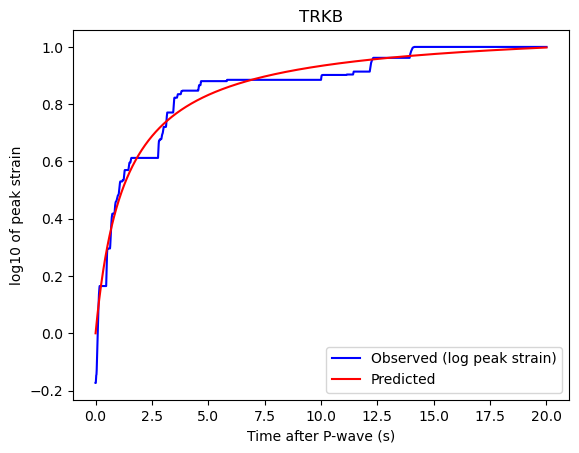

Processing SJNB
V0: 1.1340361009135878
tau: 0.33217072216666216
n: 3.4443479673032655
159632.65204544147


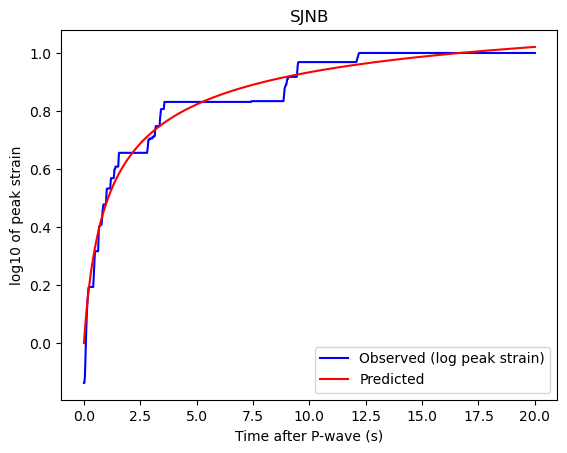

Processing HGSB
V0: 9.999999999999998
tau: 0.036174981636250096
n: 2.920915034406507
246380898.72817367


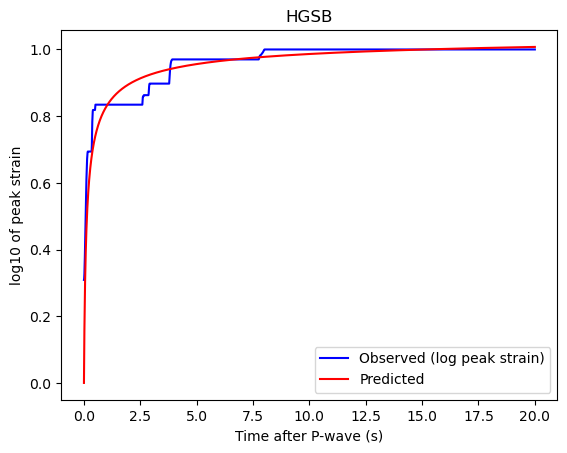

Processing CHMB
V0: 9.999999999974845
tau: 0.02091188273917886
n: 7.33561987013997
1675819402.0660913


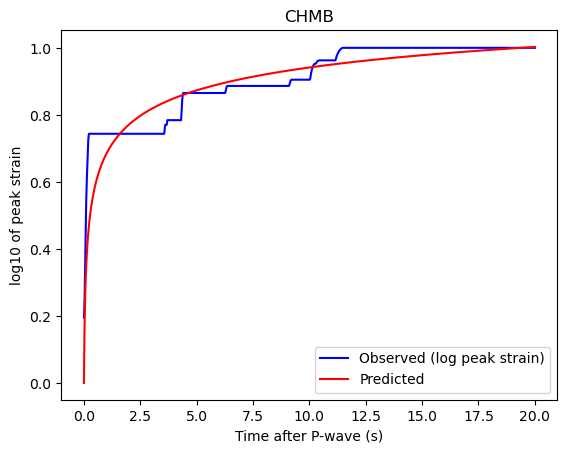

Processing SSNB
V0: 9.999999999999998
tau: 0.024651691027142025
n: 5.320333707929756
835159552.9949551


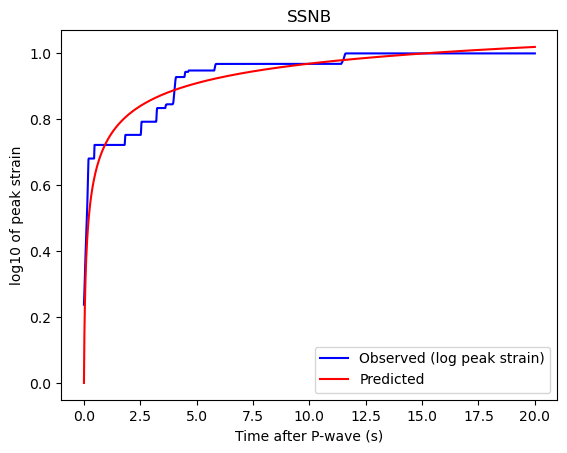

Processing ZANB
V0: 9.999999999999998
tau: 0.019926384492526435
n: 7.855879427420893
2068859666.444173


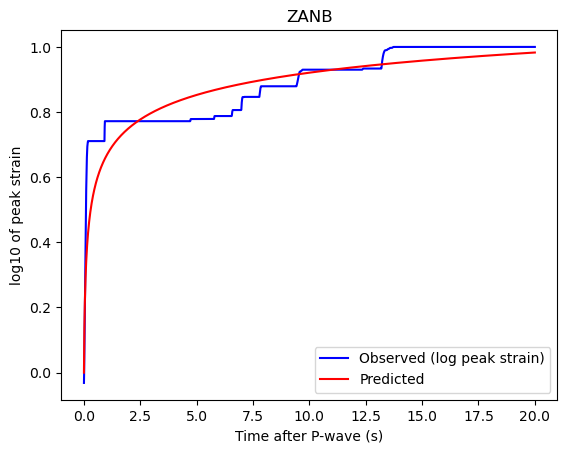

Processing FBRB
V0: 1.2868298408112857
tau: 0.15384431712330413
n: 999.9999999999999
4616139926759587.0


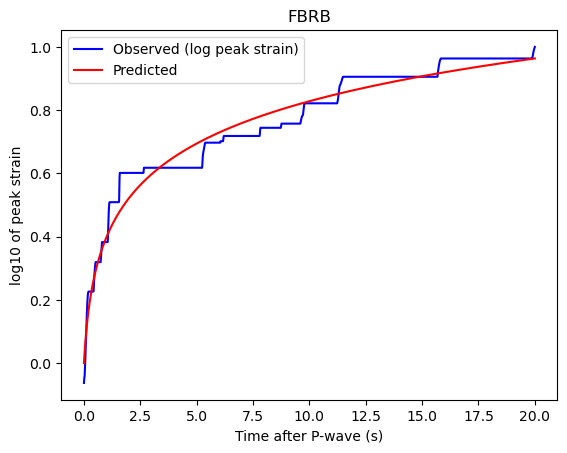

Processing SSTB
V0: 3.9197981940729902
tau: 0.03845590120008616
n: 999.999999942975
5.5876233126396e+16


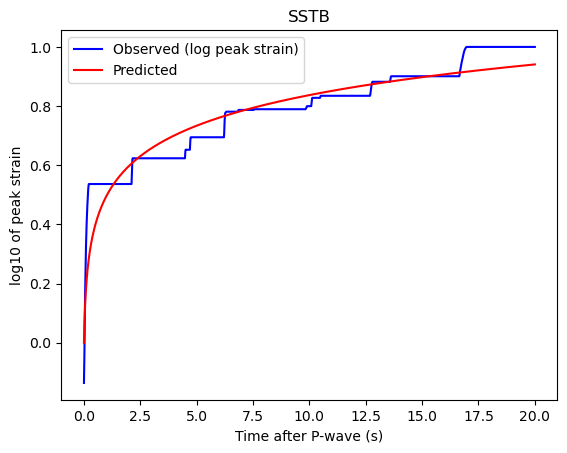

Processing DONB
V0: 0.7826948734739391
tau: 0.2916387984054483
n: 999.9999998532455
1924475933573685.5


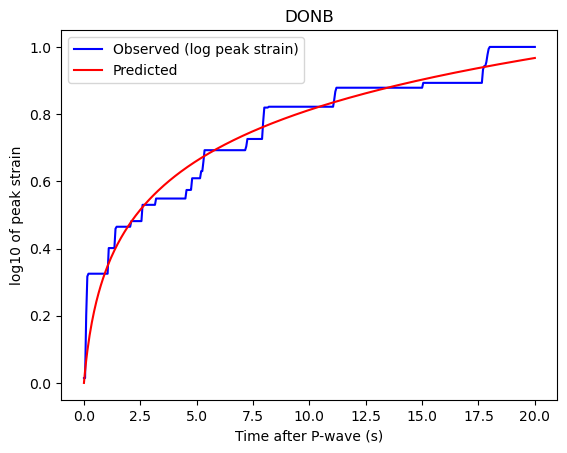

2018-02-04_M6.1


In [97]:
for ii in range(len(events)):
    
    evt_id = events['evt_id'][ii]
    print(evt_id)

    for idx in range(len(snr_array)):

        sta = snr_array['Sta'][idx]
        
        if evt_id == '2009-10-03_M6.1':
            hypdist = snr_array['2009_hyp_dist_km'][idx]
        elif evt_id == '2013-10-31_M6.3':
            hypdist = snr_array['2013_hyp_dist_km'][idx]
        elif evt_id == '2018-02-04_M6.1':
            hypdist = snr_array['2018_hyp_dist_km'][idx]
        
        int_hypdist = int(hypdist)

        # Figure out the bounds for the MCMC based on the event and hypocentral distance (rainbow plots)
        xlow = 10
        xhigh = 20 # For Taiwan
        
        if evt_id == '2013-10-31_M6.3':
            pass
        else:
            continue
        
        try:
            pst = read(path + 'filtered_abs_peak_post_p/' + evt_id + '/' + sta + '.mseed')
        except:
            continue
            
        starttime = pst[0].stats.starttime + xlow
        endtime = starttime + xhigh
        pst_trim = pst.trim(starttime = starttime, endtime = endtime, pad = True, fill_value = 0)

        print('Processing ' + str(sta))

        times = pst_trim[0].times()
        data = pst_trim[0].data
        log10_data = np.log10(data)
        samp_rate = pst_trim[0].stats.sampling_rate

        xobserved = times
        yobserved = log10_data / max(log10_data)

        popt, pcov = curve_fit(montesi11b, xobserved, yobserved, bounds = (0, [10, 10, 1000]))
        
        print('V0: ' + str(popt[0]))
        print('tau: ' + str(popt[1]))
        print('n: ' + str(popt[2]))
        
        print(np.linalg.cond(pcov))

        # Plot all solutions
        fig = plt.figure(dpi = 100)
        ax = fig.add_subplot(111)
        ax.set_title(str(sta))

        ax.plot(xobserved, yobserved, color = 'blue', label = 'Observed (log peak strain)') # ----------------------
        ax.plot(xobserved, montesi11b(xobserved, *popt), color = 'red', label = 'Predicted') # ----------------------
        ax.set_xlabel('Time after P-wave (s)')
        ax.set_ylabel('log10 of peak strain')
        # ax.set_xlim(10,13)
        ax.legend()

        plt.show()



In [70]:
popt

array([1.22812893e+01, 3.80676131e-02, 7.62385440e+04])

2009-10-03_M6.1
2013-10-31_M6.3
Processing TRKB
100.0


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 1_000 tune and 9_000 draw iterations (4_000 + 36_000 draws total) took 50 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       2.134  0.126   1.848    2.294      0.035    0.026      11.0   
m2       0.105  0.006   0.093    0.114      0.002    0.001      15.0   
xinter  11.207  0.101  11.101   11.435      0.028    0.020      11.0   
sigma    0.210  0.007   0.198    0.222      0.001    0.001      61.0   

        ess_tail  r_hat  
m1          41.0   1.25  
m2          43.0   1.18  
xinter      41.0   1.26  
sigma       50.0   1.04  


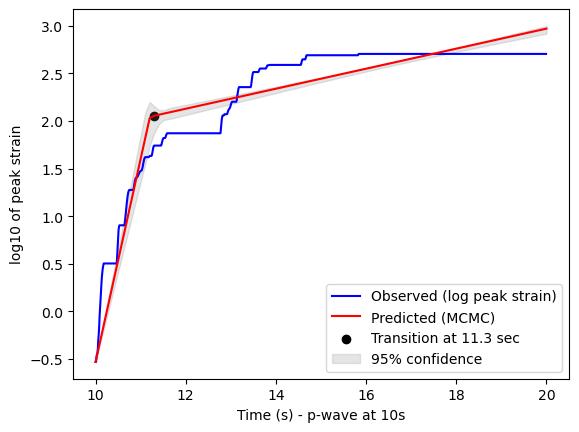

Processing SJNB
100.0


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 1_000 tune and 9_000 draw iterations (4_000 + 36_000 draws total) took 50 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       2.232  0.107   2.021    2.385      0.039    0.029       7.0   
m2       0.099  0.004   0.091    0.106      0.001    0.001      11.0   
xinter  11.140  0.072  11.054   11.280      0.026    0.019       7.0   
sigma    0.170  0.005   0.161    0.178      0.001    0.000      62.0   

        ess_tail  r_hat  
m1          39.0   1.55  
m2          43.0   1.27  
xinter      40.0   1.53  
sigma       60.0   1.04  


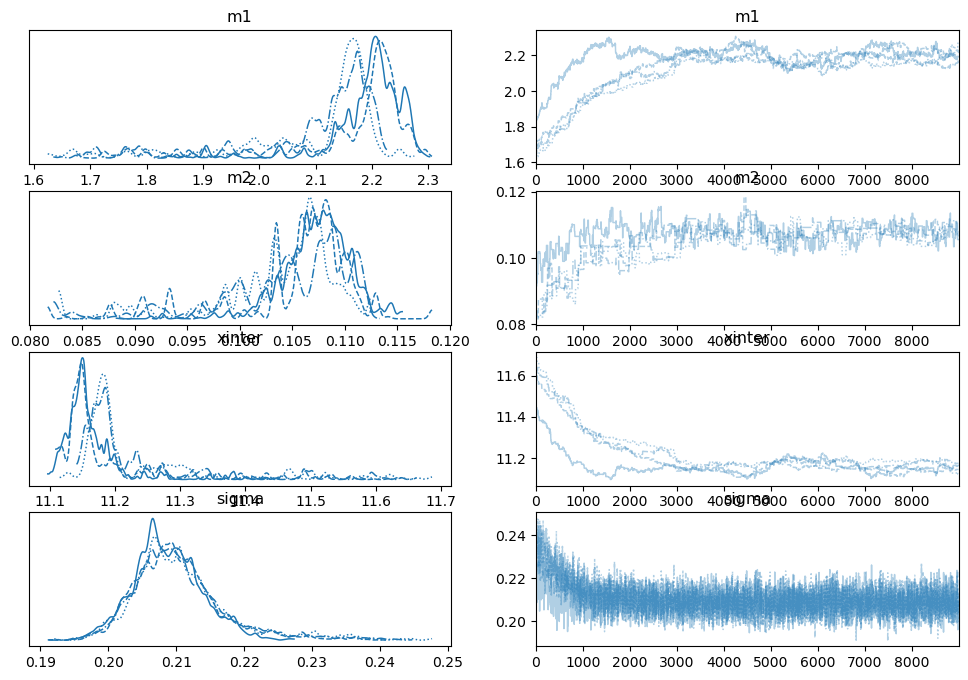

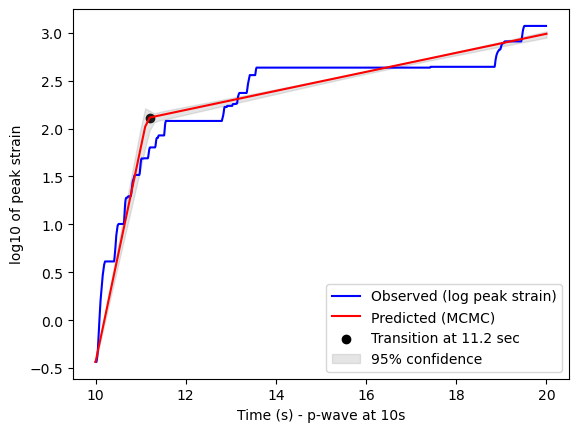

Processing HGSB
100.0


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 1_000 tune and 9_000 draw iterations (4_000 + 36_000 draws total) took 50 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       5.264  0.759   3.871    6.783      0.313    0.242       6.0   
m2       0.082  0.003   0.077    0.086      0.001    0.001       9.0   
xinter  10.406  0.072  10.302   10.547      0.027    0.020       6.0   
sigma    0.131  0.013   0.117    0.156      0.004    0.003       8.0   

        ess_tail  r_hat  
m1          11.0   1.91  
m2          38.0   1.38  
xinter      11.0   1.92  
sigma       44.0   1.42  


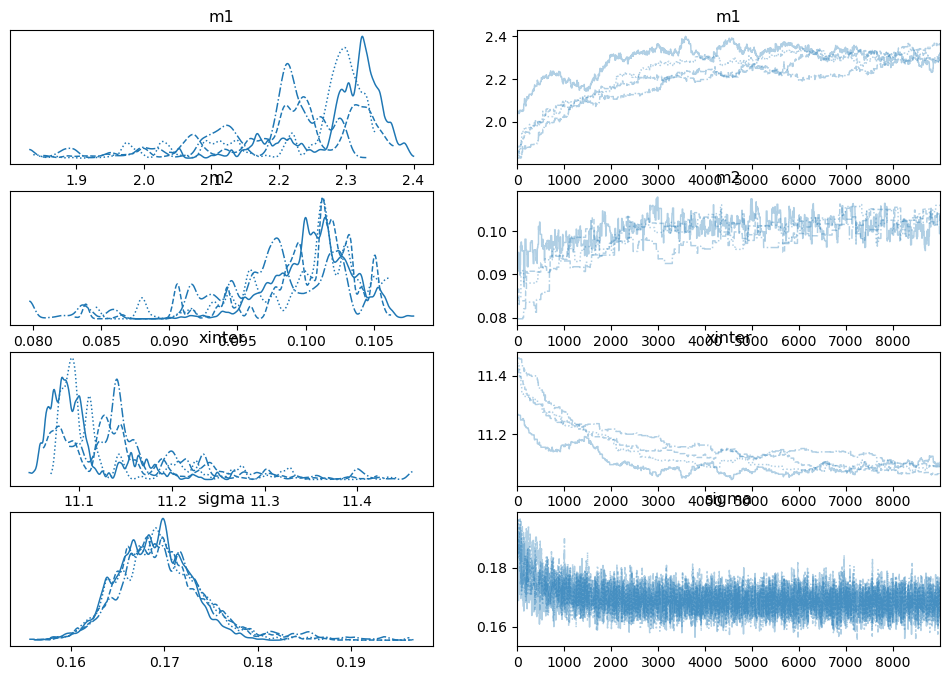

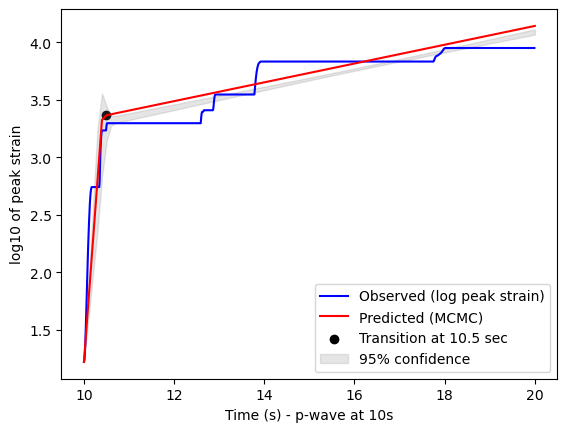

Processing CHMB
100.0


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 1_000 tune and 9_000 draw iterations (4_000 + 36_000 draws total) took 49 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       8.073  1.612   5.012   10.684      0.668    0.522       5.0   
m2       0.077  0.002   0.073    0.081      0.001    0.000      12.0   
xinter  10.254  0.068  10.180   10.391      0.024    0.018       5.0   
sigma    0.111  0.023   0.088    0.159      0.008    0.006       6.0   

        ess_tail  r_hat  
m1          11.0   2.04  
m2          50.0   1.26  
xinter      11.0   2.04  
sigma       15.0   1.82  


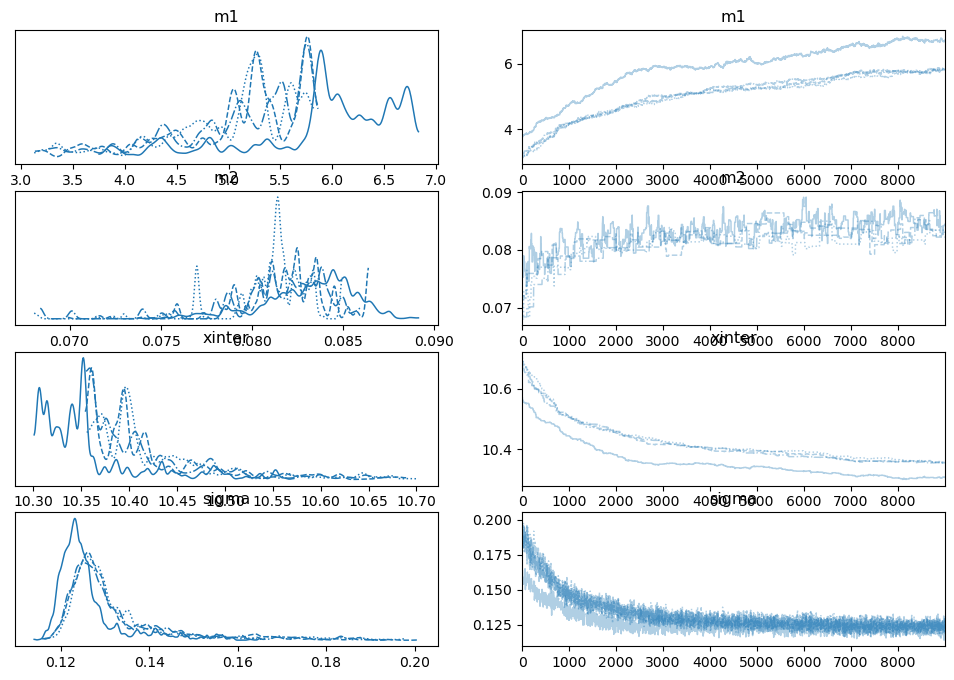

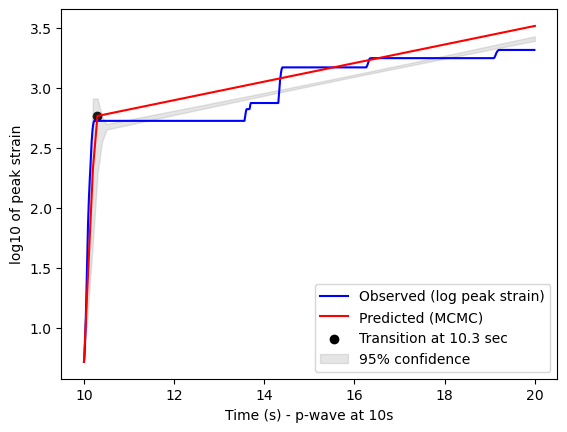

Processing SSNB
100.0


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 1_000 tune and 9_000 draw iterations (4_000 + 36_000 draws total) took 48 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       6.014  1.270   3.533    7.583      0.513    0.396       6.0   
m2       0.127  0.003   0.120    0.132      0.001    0.001      16.0   
xinter  10.349  0.107  10.255   10.571      0.037    0.027       6.0   
sigma    0.180  0.016   0.161    0.213      0.005    0.004       8.0   

        ess_tail  r_hat  
m1          27.0   1.74  
m2          35.0   1.18  
xinter      40.0   1.72  
sigma       52.0   1.42  


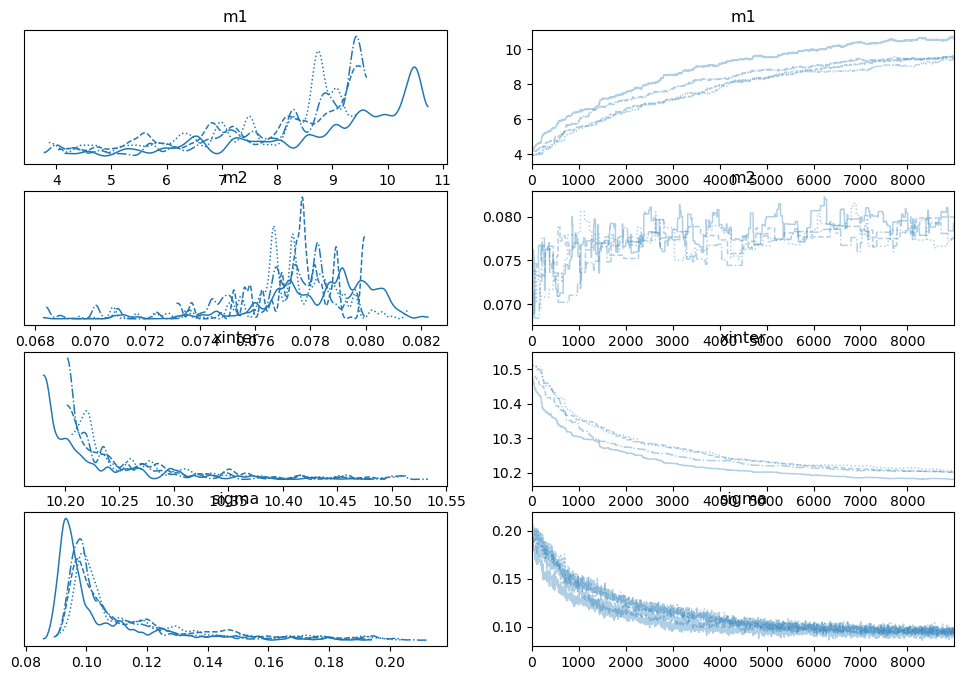

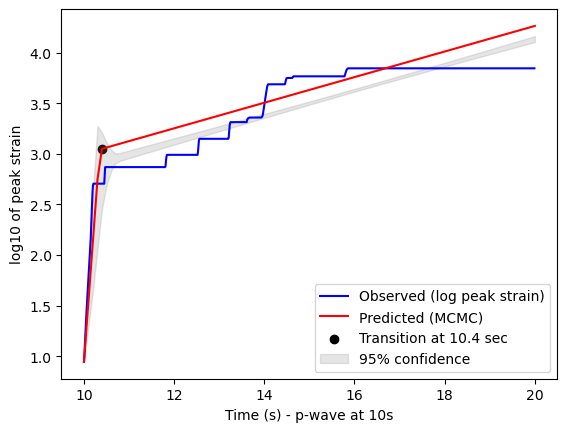

Processing ZANB
100.0


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 1_000 tune and 9_000 draw iterations (4_000 + 36_000 draws total) took 50 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1      11.876  2.988   5.120   16.310      1.286    0.999       5.0   
m2       0.061  0.003   0.055    0.067      0.001    0.001       8.0   
xinter  10.257  0.084  10.156   10.431      0.031    0.023       5.0   
sigma    0.149  0.046   0.090    0.243      0.018    0.013       5.0   

        ess_tail  r_hat  
m1          11.0   2.01  
m2          33.0   1.46  
xinter      11.0   2.02  
sigma       11.0   2.00  


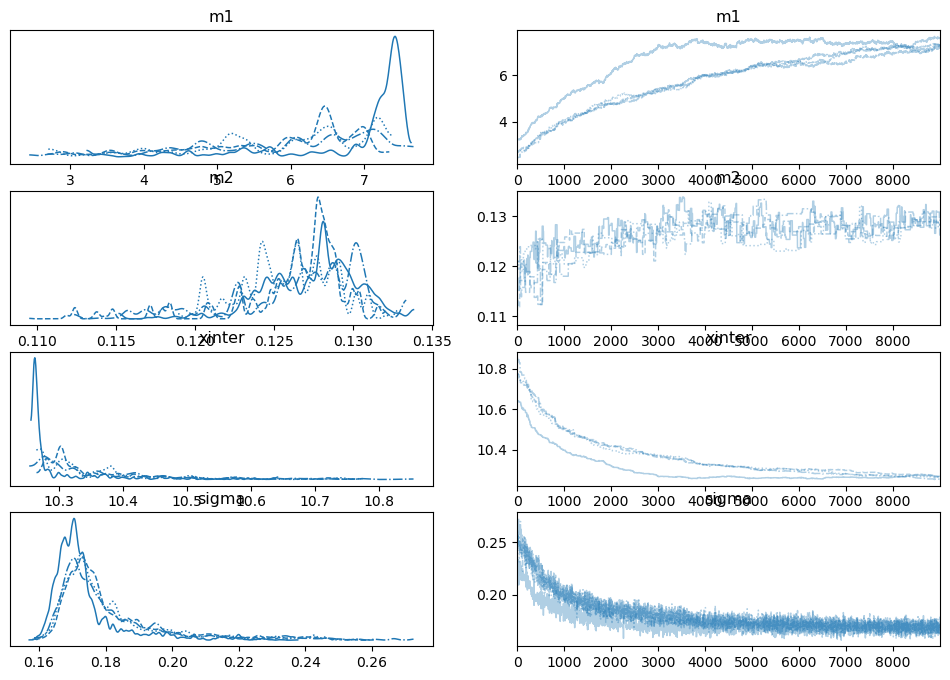

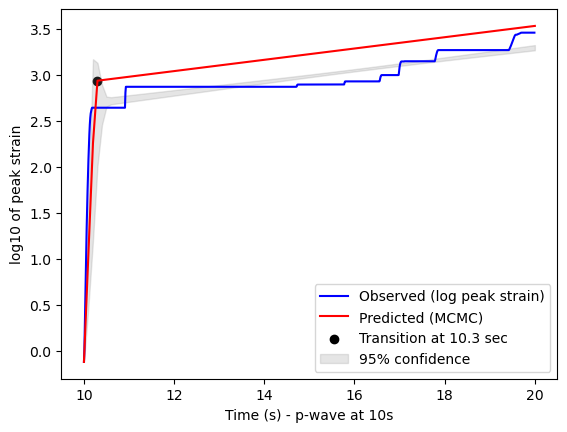

Processing FBRB
100.0


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 1_000 tune and 9_000 draw iterations (4_000 + 36_000 draws total) took 57 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       1.658  0.050   1.550    1.717      0.018    0.014       7.0   
m2       0.084  0.002   0.079    0.088      0.001    0.001      14.0   
xinter  11.161  0.046  11.107   11.251      0.016    0.012       7.0   
sigma    0.117  0.003   0.111    0.122      0.000    0.000      58.0   

        ess_tail  r_hat  
m1          39.0   1.62  
m2          33.0   1.21  
xinter      36.0   1.63  
sigma       67.0   1.04  


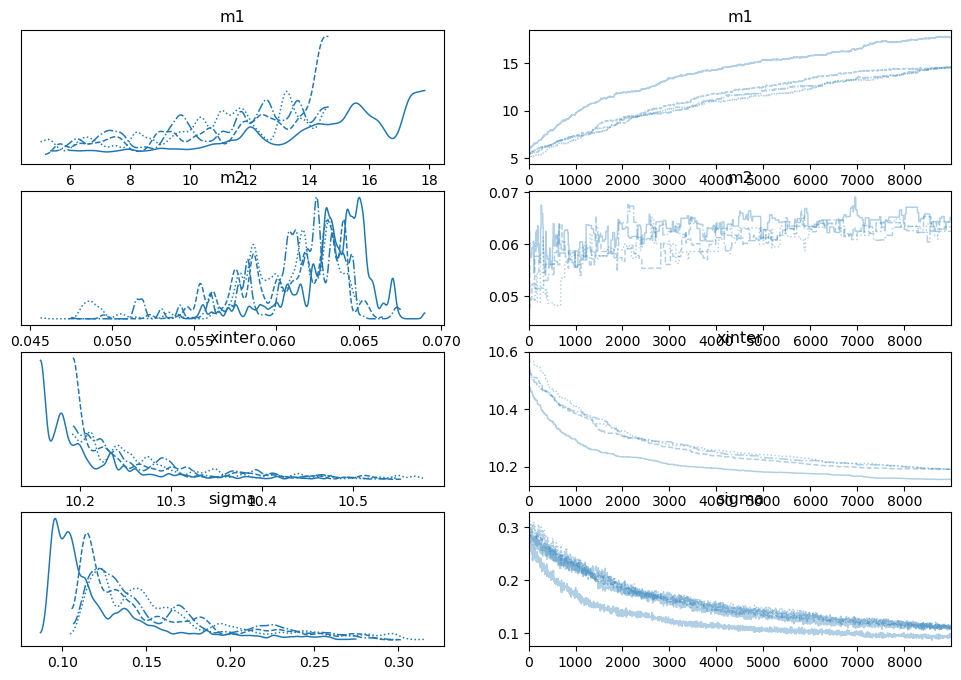

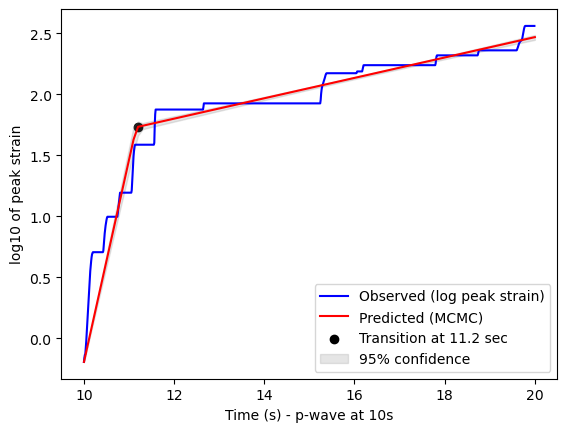

Processing SSTB
100.0


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 1_000 tune and 9_000 draw iterations (4_000 + 36_000 draws total) took 52 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       9.085  1.969   5.298   12.349      0.813    0.636       5.0   
m2       0.100  0.002   0.094    0.103      0.001    0.001       8.0   
xinter  10.242  0.072  10.166   10.395      0.025    0.018       5.0   
sigma    0.112  0.027   0.083    0.172      0.009    0.007       6.0   

        ess_tail  r_hat  
m1          11.0   1.97  
m2          50.0   1.43  
xinter      11.0   1.97  
sigma       14.0   1.87  


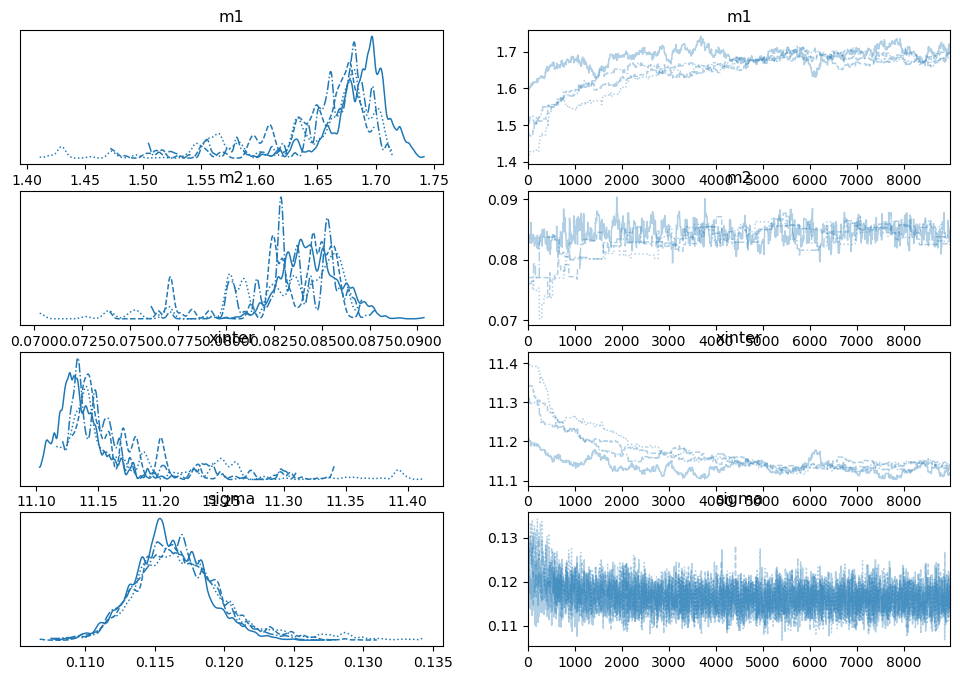

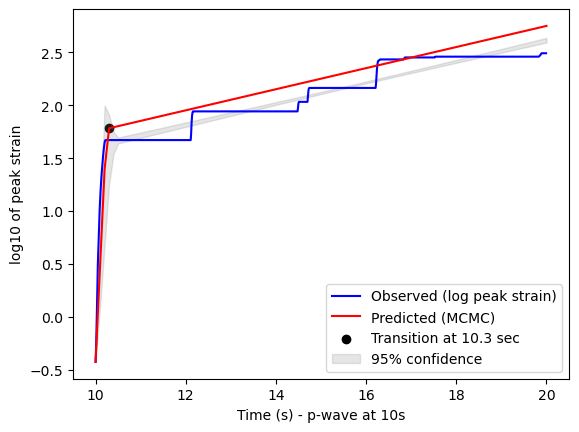

Processing DONB
20.0


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 1_000 tune and 9_000 draw iterations (4_000 + 36_000 draws total) took 55 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       3.579  1.102   1.338    5.144      0.459    0.368       5.0   
m2       0.148  0.003   0.142    0.154      0.001    0.001      13.0   
xinter  10.325  0.180  10.176   10.733      0.057    0.041       5.0   
sigma    0.094  0.012   0.079    0.121      0.003    0.002      12.0   

        ess_tail  r_hat  
m1          18.0   2.14  
m2          43.0   1.22  
xinter      17.0   2.15  
sigma       45.0   1.24  


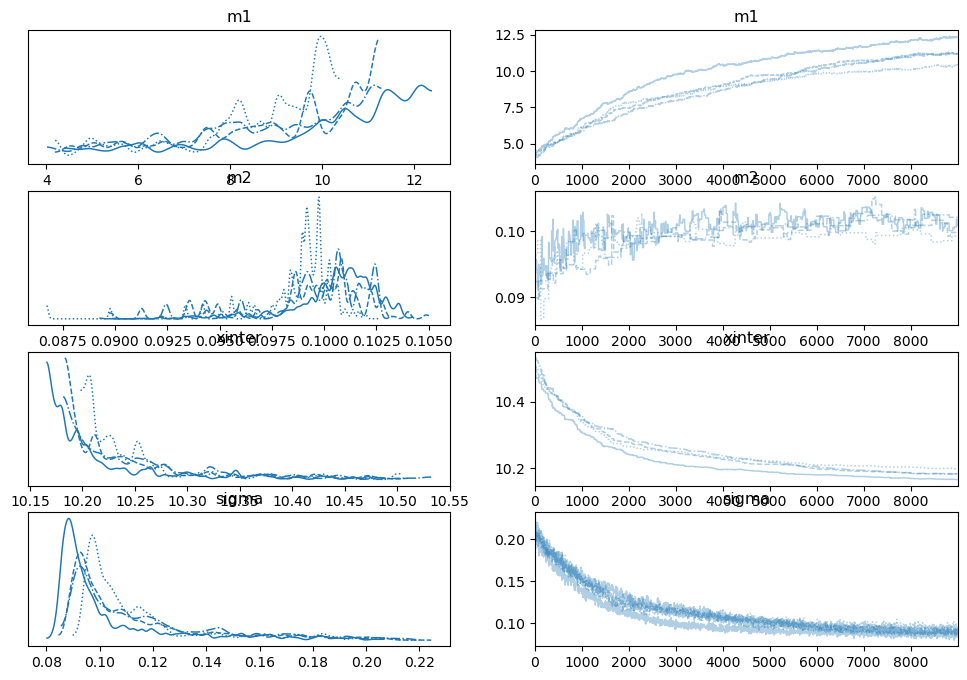

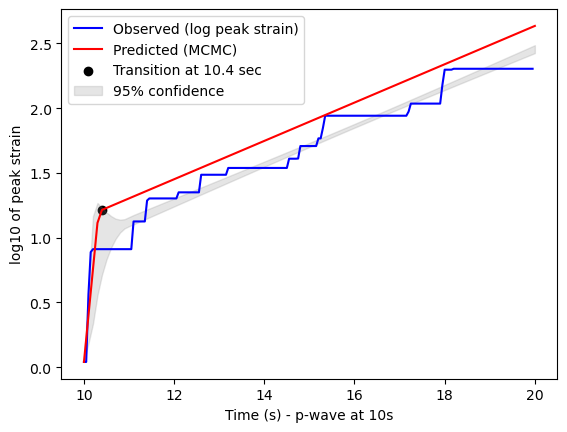

2018-02-04_M6.1
Processing TRKB
20.0


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 1_000 tune and 9_000 draw iterations (4_000 + 36_000 draws total) took 53 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       2.924  0.223   2.507    3.299      0.078    0.058       7.0   
m2       0.037  0.008   0.022    0.052      0.002    0.001      24.0   
xinter  11.013  0.096  10.855   11.167      0.032    0.023       7.0   
sigma    0.216  0.012   0.194    0.238      0.001    0.001     213.0   

        ess_tail  r_hat  
m1          17.0   1.51  
m2          75.0   1.12  
xinter      19.0   1.51  
sigma      235.0   1.02  


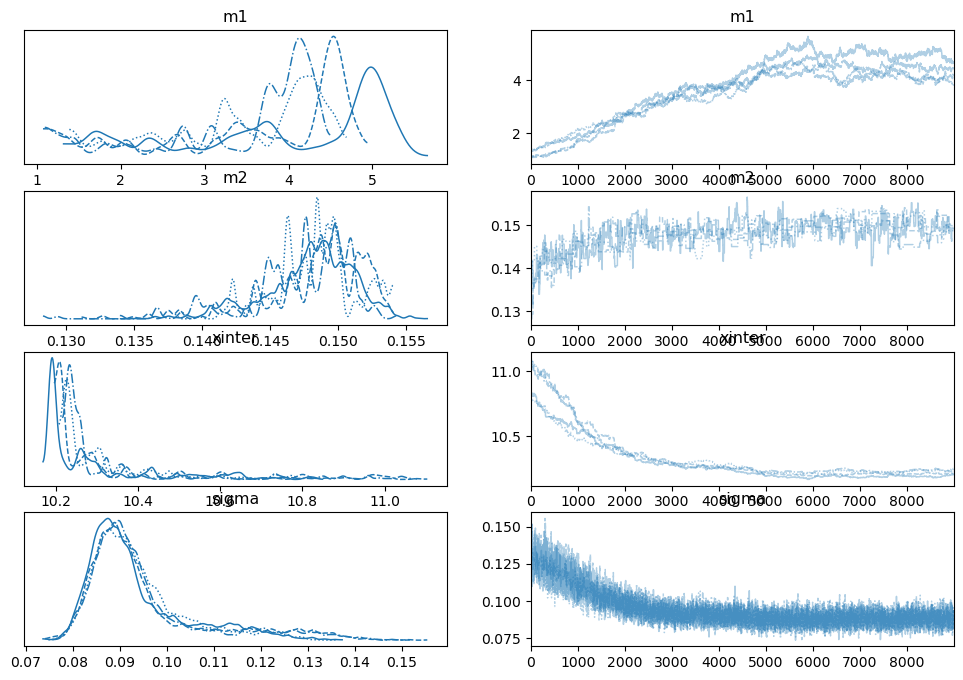

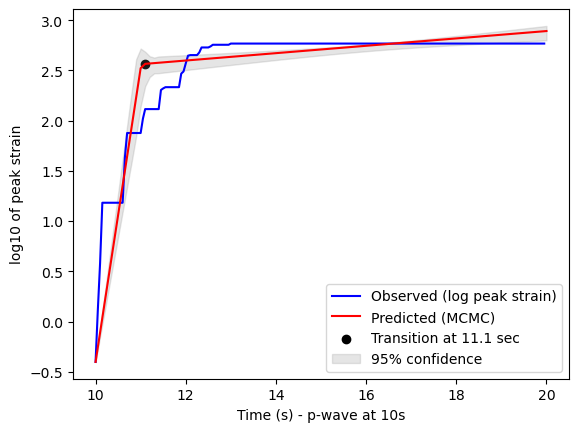

Processing SJNB
20.0


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 1_000 tune and 9_000 draw iterations (4_000 + 36_000 draws total) took 52 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       1.171  0.040   1.098     1.25      0.009    0.006      23.0   
m2       0.062  0.004   0.054     0.07      0.001    0.000      50.0   
xinter  11.503  0.067  11.373    11.62      0.014    0.010      21.0   
sigma    0.120  0.006   0.108     0.13      0.000    0.000    7613.0   

        ess_tail  r_hat  
m1          50.0   1.13  
m2         128.0   1.07  
xinter      54.0   1.14  
sigma     9591.0   1.00  


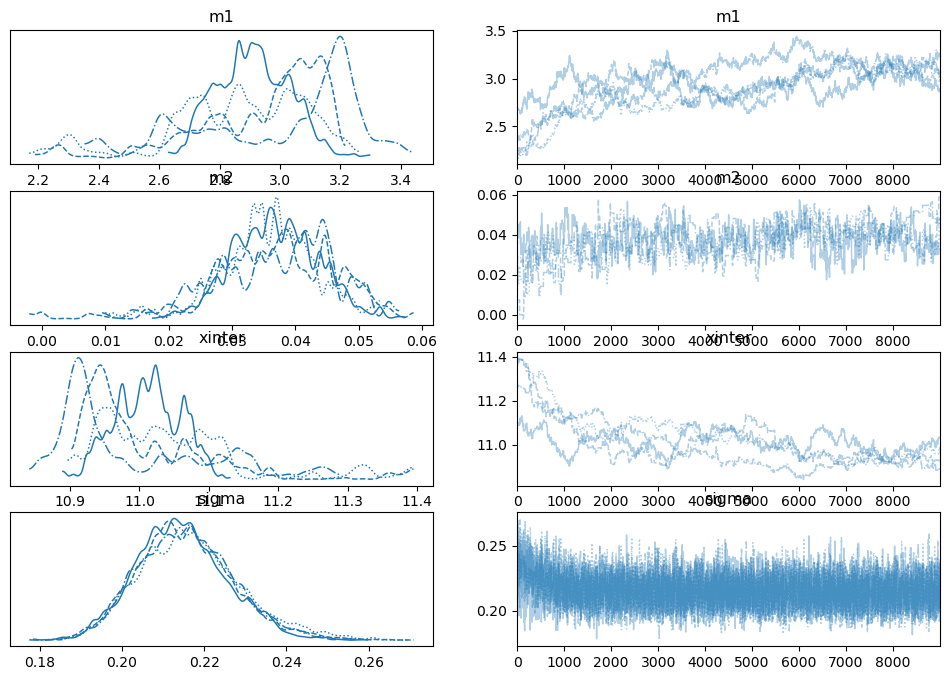

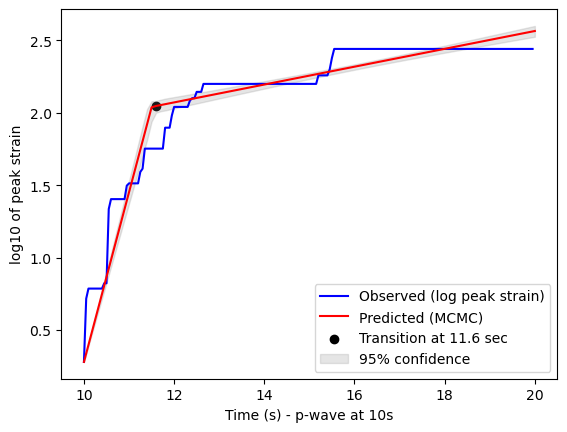

Processing HGSB
20.0


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 1_000 tune and 9_000 draw iterations (4_000 + 36_000 draws total) took 53 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       2.459  0.127   2.188    2.685      0.035    0.025      13.0   
m2       0.139  0.003   0.133    0.146      0.001    0.000      36.0   
xinter  10.761  0.047  10.670   10.853      0.013    0.009      12.0   
sigma    0.105  0.006   0.095    0.116      0.000    0.000     212.0   

        ess_tail  r_hat  
m1          38.0   1.24  
m2         177.0   1.08  
xinter      37.0   1.25  
sigma      293.0   1.02  


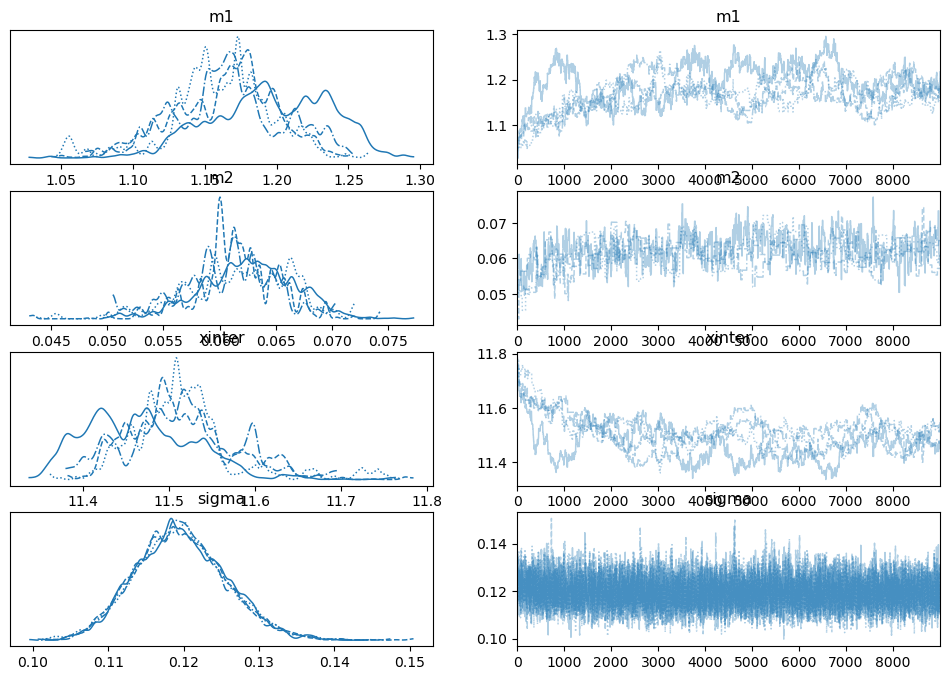

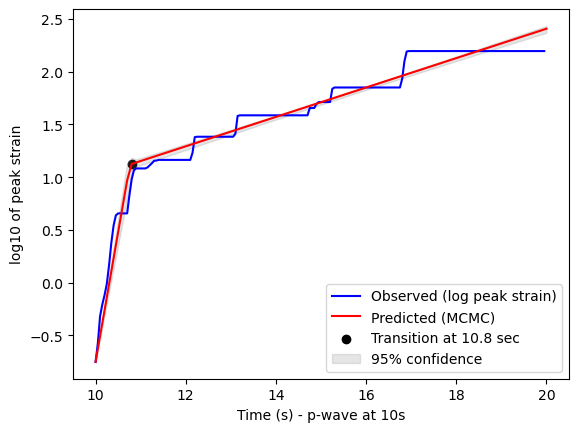

Processing CHMB
20.0


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 1_000 tune and 9_000 draw iterations (4_000 + 36_000 draws total) took 57 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       0.661  0.012   0.640    0.685      0.002    0.001      40.0   
m2       0.084  0.003   0.078    0.089      0.000    0.000     218.0   
xinter  11.992  0.046  11.907   12.074      0.005    0.004      73.0   
sigma    0.096  0.005   0.087    0.106      0.000    0.000    7181.0   

        ess_tail  r_hat  
m1         209.0   1.09  
m2         359.0   1.04  
xinter     283.0   1.05  
sigma     8529.0   1.00  


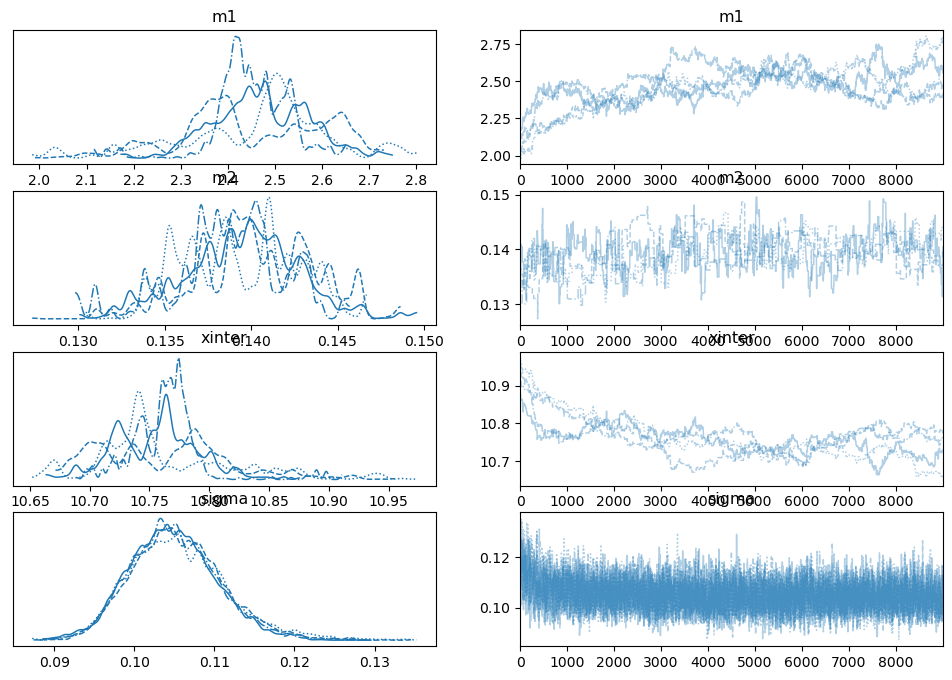

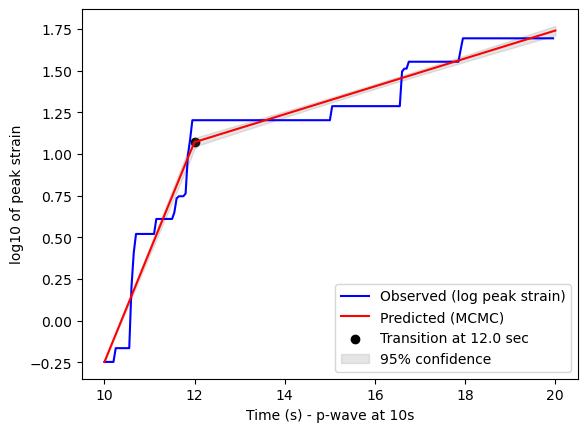

Processing SSNB
20.0


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 1_000 tune and 9_000 draw iterations (4_000 + 36_000 draws total) took 55 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       1.762  0.107   1.573    1.978      0.032    0.024      10.0   
m2       0.125  0.003   0.119    0.130      0.000    0.000     123.0   
xinter  10.768  0.058  10.671   10.869      0.015    0.011      11.0   
sigma    0.109  0.006   0.099    0.120      0.000    0.000    1853.0   

        ess_tail  r_hat  
m1          41.0   1.33  
m2         266.0   1.01  
xinter      40.0   1.29  
sigma     3253.0   1.00  


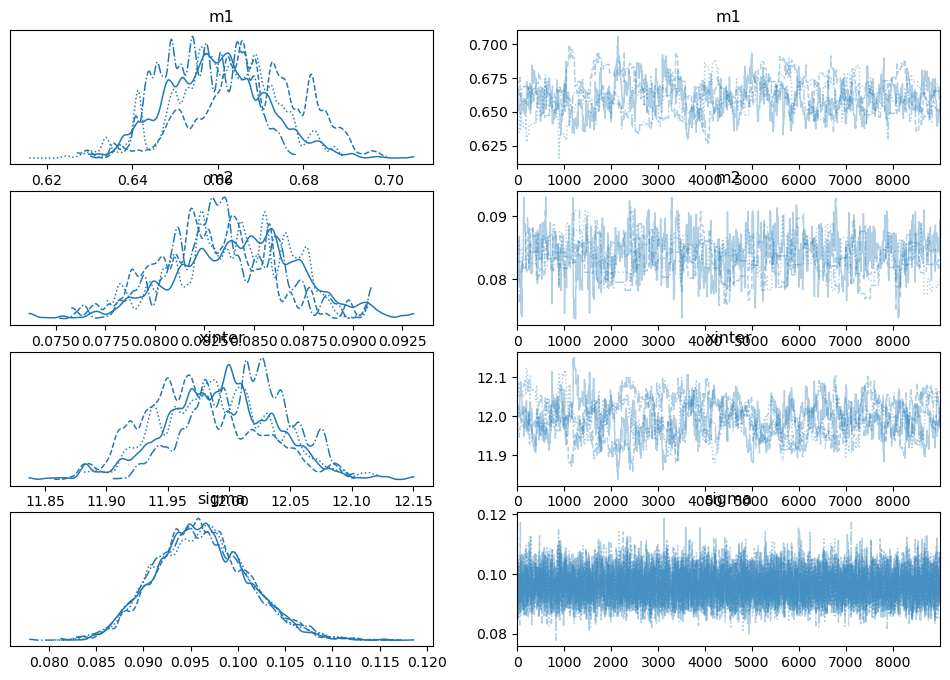

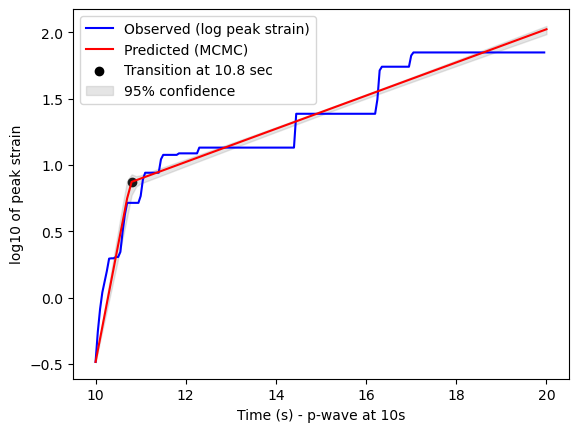

Processing ZANB
20.0


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 1_000 tune and 9_000 draw iterations (4_000 + 36_000 draws total) took 65 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       2.077  0.172   1.706    2.319      0.060    0.045       7.0   
m2       0.044  0.003   0.038    0.049      0.001    0.001      14.0   
xinter  10.699  0.075  10.607   10.851      0.025    0.018       7.0   
sigma    0.076  0.005   0.066    0.085      0.001    0.001      37.0   

        ess_tail  r_hat  
m1          30.0   1.58  
m2          43.0   1.21  
xinter      22.0   1.60  
sigma       49.0   1.07  


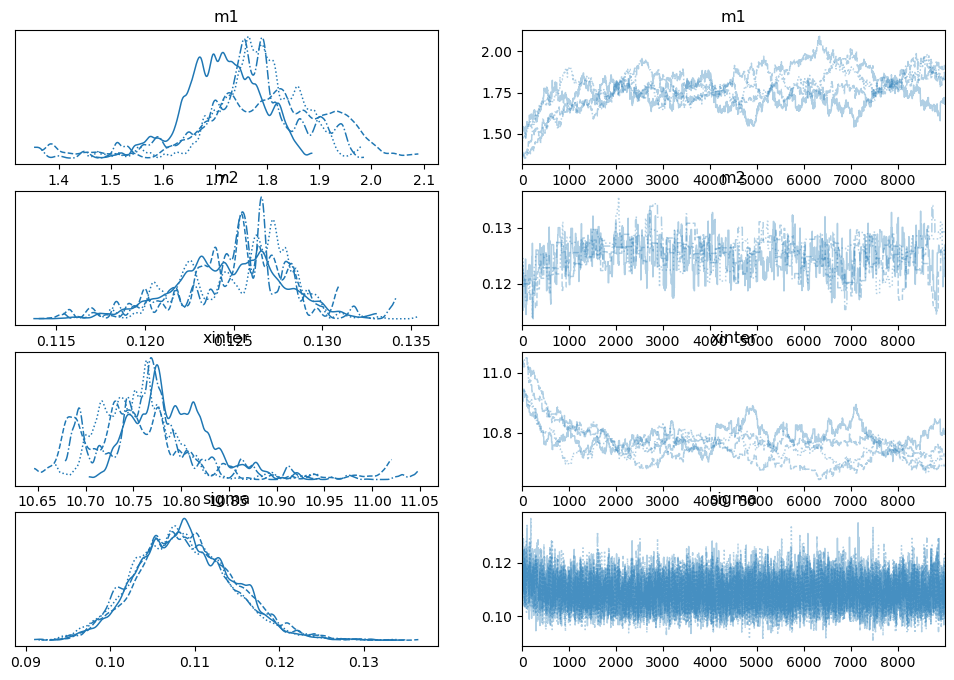

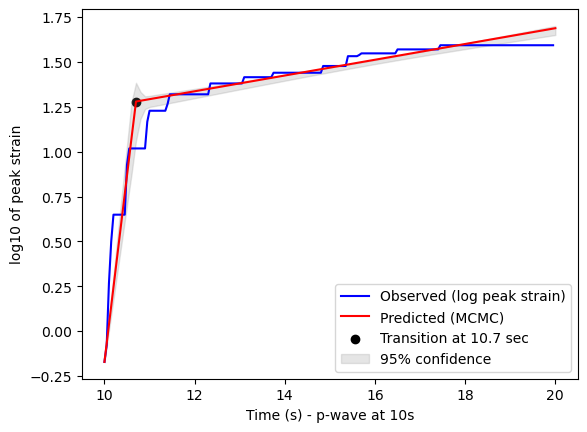

Processing FBRB
20.0


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 1_000 tune and 9_000 draw iterations (4_000 + 36_000 draws total) took 55 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       2.591  0.132   2.377    2.886      0.033    0.024      16.0   
m2       0.101  0.006   0.090    0.111      0.001    0.000      90.0   
xinter  10.947  0.060  10.841   11.050      0.015    0.011      15.0   
sigma    0.180  0.009   0.163    0.198      0.000    0.000    1326.0   

        ess_tail  r_hat  
m1          37.0   1.19  
m2         472.0   1.05  
xinter      38.0   1.20  
sigma     2939.0   1.01  


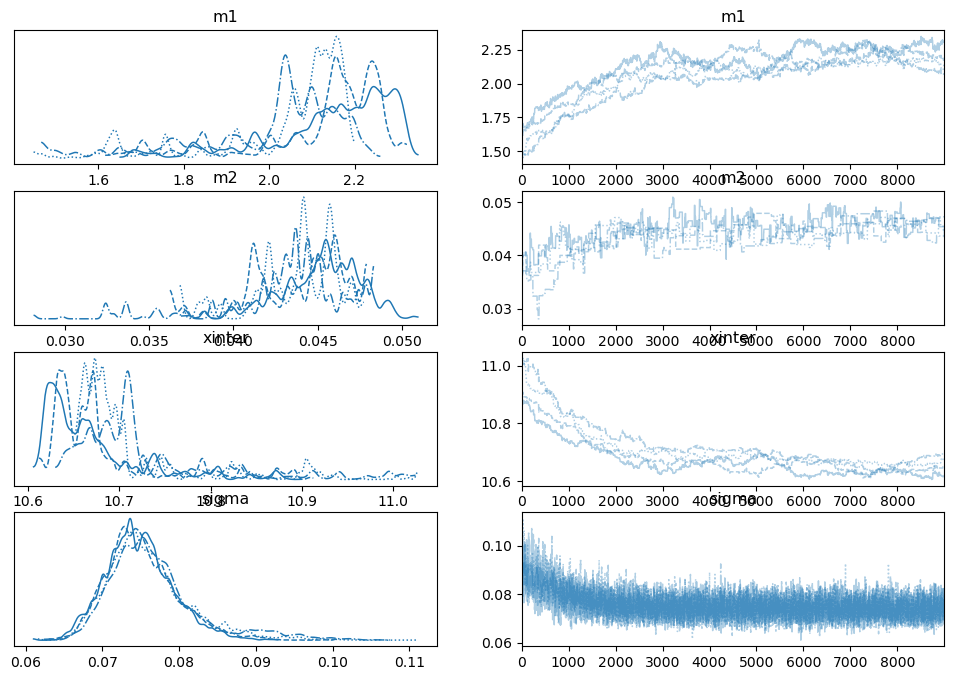

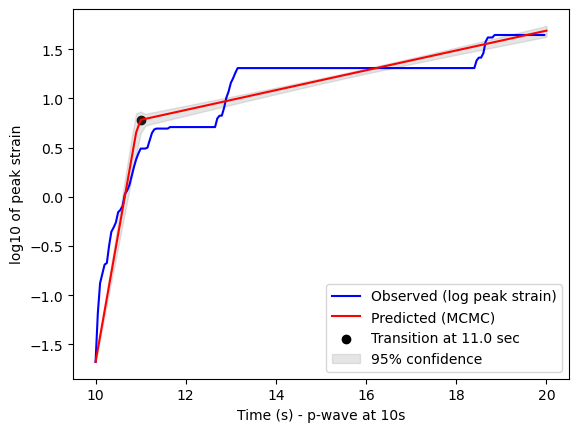

Processing SSTB
20.0


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


Sampling 4 chains for 1_000 tune and 9_000 draw iterations (4_000 + 36_000 draws total) took 59 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       0.990  0.033   0.926    1.050      0.005    0.003      73.0   
m2       0.086  0.004   0.079    0.093      0.000    0.000     107.0   
xinter  11.362  0.056  11.264   11.474      0.010    0.007      35.0   
sigma    0.120  0.006   0.108    0.131      0.000    0.000    6746.0   

        ess_tail  r_hat  
m1          59.0   1.07  
m2         184.0   1.03  
xinter      48.0   1.10  
sigma     8473.0   1.00  


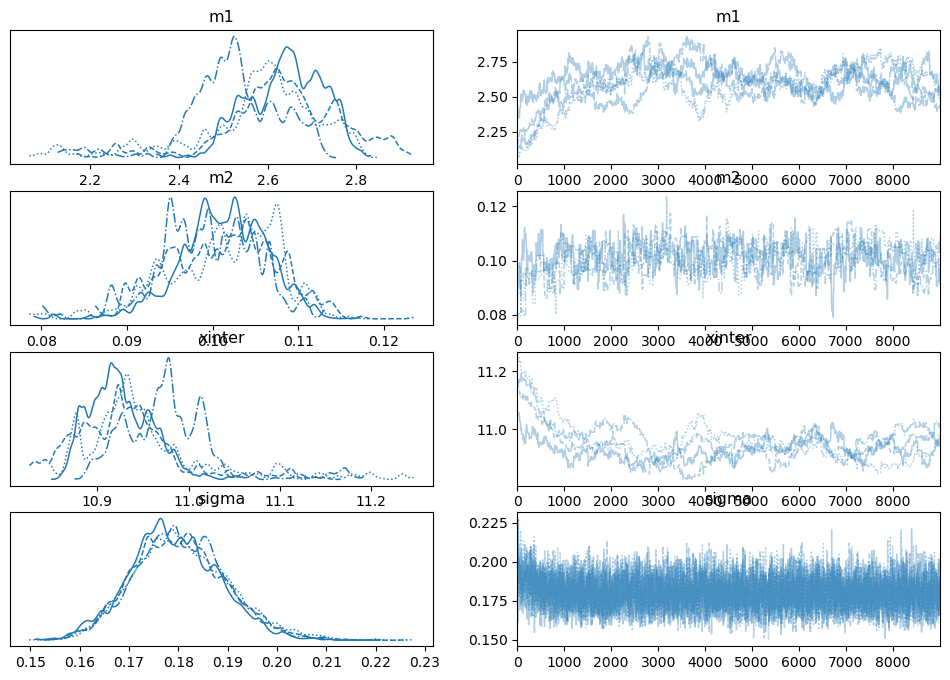

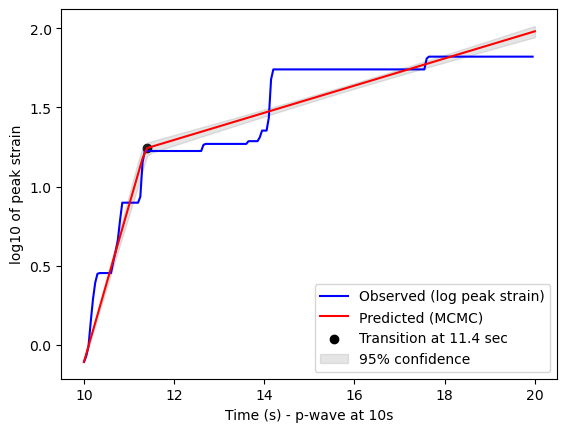

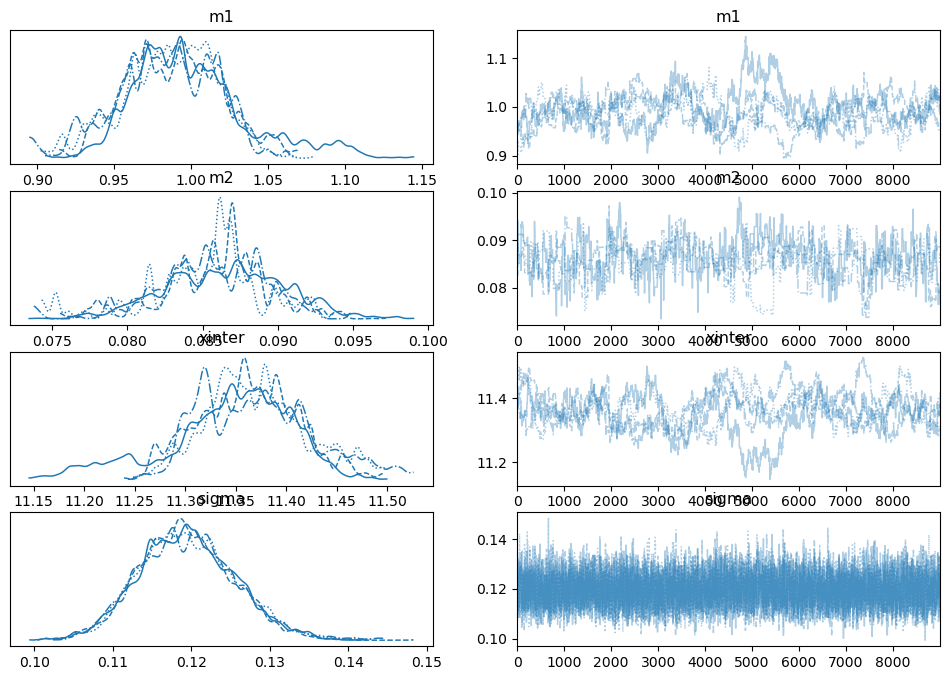

In [133]:
for ii in range(len(events)):
    
    evt_id = events['evt_id'][ii]
    print(evt_id)

    for idx in range(len(snr_array)):

        sta = snr_array['Sta'][idx]
        
        if evt_id == '2009-10-03_M6.1':
            hypdist = snr_array['2009_hyp_dist_km'][idx]
        elif evt_id == '2013-10-31_M6.3':
            hypdist = snr_array['2013_hyp_dist_km'][idx]
        elif evt_id == '2018-02-04_M6.1':
            hypdist = snr_array['2018_hyp_dist_km'][idx]
        
        int_hypdist = int(hypdist)

        # Figure out the bounds for the MCMC based on the event and hypocentral distance (rainbow plots)
        xlow = 10
        xhigh = 20 # For Taiwan
        
        # if evt_id == '2013-10-31_M6.3' and sta == 'SSTB':
        #     pass
        # else:
        #     continue
        
        try:
            pst = read(path + 'filtered_abs_peak_post_p/' + evt_id + '/' + sta + '.mseed')
        except:
            continue

        print('Processing ' + str(sta))
        # if pst[0].stats.sampling_rate == 100:
        #     pst.decimate(5)
        
        times = pst[0].times()
        data = pst[0].data
        log10_data = np.log10(data)
        samp_rate = pst[0].stats.sampling_rate
        print(samp_rate)

        xlow = 10
        
        # print('MCMC bounds:')
        # print(xlow, xhigh)
        
        vec_start = int(xlow*samp_rate)
        vec_end = int(xhigh*samp_rate)

        # Split into x and y vectors
        xobserved = times[vec_start:vec_end]
        # print(xobserved.shape)
        
        yobserved = log10_data[vec_start:vec_end]
        # print(yobserved.shape)
        
        x0 = xobserved[0]
        y0 = yobserved[0]
        
        # in order to pass the x variable into the target function it needs to be 
        # converted to a Theano "shared" variable
        pt_xobserved = pytensor.shared(xobserved)
        pt_x0 = pytensor.shared(x0)
        pt_y0 = pytensor.shared(y0)
            
        # MCMC run parameters, these are good numbers for a "production" run. If you are
        # fooling arund these can be lower to iterate faster
        Nburn = 1000 # burn in samples that get discarded
        Nmcmc = 9000 # bump to at least 5-10k
        Nchains = 4
        Ncores = 1
        
        # Bounds for the prior distributions
        m1_low = 0 ; m1_high = 100 # lowest slope 0, highest 5
        m2_low = 0 ; m2_high = 10
        b1_low = -50 ; b1_high = 0 # lowest y-intercept -20, highest 0
        xinter_low = 10 ; xinter_high = 25 # location of the line slope change
        
        # Define the Bayesian model
        with pm.Model()as model:
            
            # Use normal distributions as priors
            m1 = pm.Normal('m1', mu=0.5, sigma=1)
            m2 = pm.Normal('m2', mu=-0.1, sigma=5)
            # b1 = pm.Normal('b1', mu=-5, sigma=5)
            xinter = pm.Uniform('xinter', lower = xinter_low, upper = xinter_high)
            sigma = pm.HalfCauchy('sigma', beta = 10, initval = 1)
        
            # This is the model
            likelihood = pm.Normal('y', mu = two_straight_lines(pt_xobserved,m1,m2,xinter,pt_x0,pt_y0),
                                    observed = yobserved, sigma = sigma)
        #    likelihood = pm.Normal('y', mu=one_straight_line(xobserved,m1,b1),observed=yobserved,
        #                           sigma=sigma)
            
            # NUTS sampler (default) is gradient based and won't work, use metropolis
            step = pm.Metropolis(scaling = 0.1)
            
            # This runs the mcmc sampler
            mcmc = pm.sample(Nmcmc, tune = Nburn, chains = Nchains, cores = Ncores, step = step)
        
        # Done, now is post-processing to get the data out of the sampler

        posterior = az.extract(mcmc)
        
        # Unwrap coeficients - WRITE LINES TO SAVE THE ARRAYS!!!
        m1_array = posterior.m1.values
        m1 = np.mean(m1_array)
        # print('m1 mean: ' + str(round(m1,2)))
        
        m2_array = posterior.m2.values
        m2 = np.mean(m2_array)
        # print('m2 mean: ' + str(round(m2,2)))
        
        xinter_array = posterior.xinter.values
        xinter = np.mean(xinter_array)
        # print('xinter Mean: ' + str(round(xinter,2)))
        
        sigma_array = posterior.sigma.values
        sigma = np.mean(sigma_array)

        # Lines!
        b1 = y0 - m1*x0
        b2 = m1*xinter + b1 - m2*xinter
        
        # Make plot to check stuff
        xpredicted = np.arange(xobserved.min(), xobserved.max()+0.1, 0.1)
        # ypredicted = np.ones(len(xpredicted))
        ypredicted = m1*xpredicted + b1
        i = np.where(xpredicted > xinter)[0]
        ypredicted[i] = m2*xpredicted[i] + b2
        
        # Get one-sigma region (need to obtain a ton of forward models and get stats)
        N = len(posterior.m1.values)
        
        yfit = np.zeros((len(xpredicted), N))
        for k in range(N):
            yfit[:,k] = non_pytensor_two_straight_lines(xpredicted,m1_array[k],m2_array[k],xinter_array[k],x0,y0)
        mu = yfit.mean(1)
        sig = yfit.std(1) * 1.95 #for 95% confidence
        mu_plus = mu + sig
        mu_minus = mu - sig
        
        # Least squares
        mls, bls = np.polyfit(xobserved, yobserved, 1)
        
        # Find the transition point in ypredicted
        diff = np.round(np.diff(ypredicted), decimals = 5)
        # print(diff)
        first_slope = diff[0]
        second_slope = diff[-1]
        trans_idx = np.where((diff != first_slope) & (diff != second_slope))[0][0] + 1
        
        # Get the transition point
        mcmc_trans_x = xpredicted[trans_idx] # Number
        mcmc_trans_y = ypredicted[trans_idx]
        
        print(az.summary(mcmc))
        
        # # Append things
        # events_list.append(eq_id)
        # mags_list.append(mags[idx])
        # stas_list.append(sta)
        # hypdist_list.append(int_hypdist)
        # xhighs_list.append(xhigh)
        # m1s_list.append(m1)
        # m2s_list.append(m2)
        # xinters_list.append(xinter)
        # sigmas_list.append(sigma)
        # trans_time_list.append(mcmc_trans_x)

        # Plot all solutions
        fig = plt.figure(dpi = 100)
        ax = fig.add_subplot(111)
        # ax.set_title(str(cut_ot) + '_M' + str(mags[idx]) + ': ' + str(sta))
        
        ax.plot(xobserved, yobserved, color = 'blue', label = 'Observed (log peak strain)')
        ax.plot(xpredicted, ypredicted, color = 'red', label = 'Predicted (MCMC)')
        # ax.plot(xpredicted, mu, color = 'green', linestyle = '--', label = 'yfit')
        # ax.plot(xpredicted, xpredicted * mls + bls, color = 'orange', label = 'np.polyfit least squares')
        ax.scatter(xpredicted[trans_idx], ypredicted[trans_idx], marker = 'o', color = 'black', label = 'Transition at ' + str(round(xpredicted[trans_idx],2)) + ' sec')
        # ax.scatter(closest_trans_x, closest_trans_y, marker = 'o', color = 'green', label = 'Adjusted transition at ' + str(round(closest_trans_x,2)) + ' sec')
        # ax2 = ax.twinx()
        # ax2.plot(xobserved, pythags_arr, color = 'violet')
        # ax2.axhline(closest_trans_x, color = 'violet', linestyle = '--')
        ax.fill_between(xpredicted, mu_plus, mu_minus, color = 'gray', alpha = 0.2, label = '95% confidence') # 95% confidence interval
        ax.set_xlabel('Time (s) - p-wave at 10s')
        ax.set_ylabel('log10 of peak strain')
        # ax.set_xlim(10,13)
        ax.legend()
        
        plt.show()
        
        az.plot_trace(mcmc)
        
#         # Create folder for the event
#         array_save_dir = path_to_files + 'mcmc_arrays/' + str(cut_ot) + '_M' + str(mags[idx]) + '/' + str(sta) + '/'
#         if os.path.isdir(array_save_dir):
#             pass
#         else:
#             os.makedirs(array_save_dir)

#         np.save(array_save_dir + 'xobserved.npy', xobserved)
#         np.save(array_save_dir + 'yobserved.npy', yobserved)
#         np.save(array_save_dir + 'xpredicted.npy', xpredicted)
#         np.save(array_save_dir + 'ypredicted.npy', ypredicted)
#         np.save(array_save_dir + 'forward_mus.npy', mu)
#         np.save(array_save_dir + 'foward_sigs.npy', sig)
        
#         fig_save_dir = path_to_files + 'figures/mcmc_plots/' + str(cut_ot) + '_M' + str(mags[idx]) + '/'
#         if os.path.isdir(fig_save_dir):
#             pass
#         else:
#             os.makedirs(fig_save_dir)
            
#         plt.savefig(fig_save_dir + sta + '.png', format = 'PNG', dpi = 400)
#         plt.close()
        
#         # print(str(sta) + ' done')



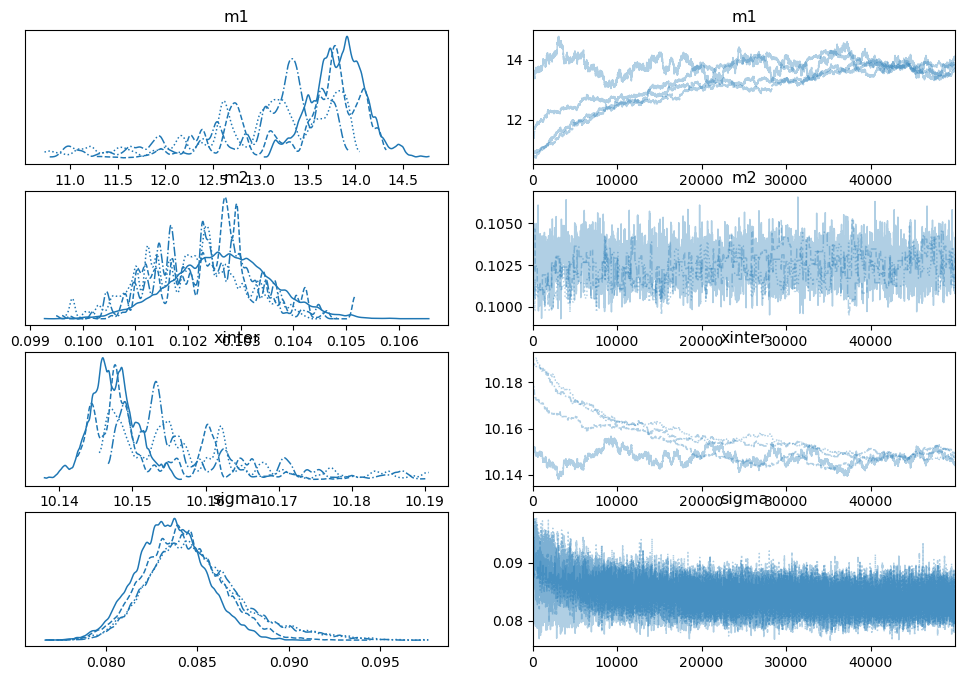

In [128]:
az.plot_trace(mcmc);

In [118]:
az.summary(mcmc)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1      12.479  1.687   9.969   15.558      0.808    0.620       5.0   
m2       0.101  0.001   0.099    0.104      0.000    0.000      11.0   
xinter  10.167  0.023  10.130   10.206      0.011    0.008       5.0   
sigma    0.088  0.005   0.080    0.098      0.002    0.002       6.0   

        ess_tail  r_hat  
m1          16.0   2.48  
m2          32.0   1.32  
xinter      16.0   2.49  
sigma       34.0   1.73

2009-10-03_M6.1
2013-10-31_M6.3
Processing SSTB


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [V0]
>Metropolis: [tau]
>Metropolis: [n]
>Metropolis: [sigma]


/Users/sydneydybing/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),


Sampling 4 chains for 5_000 tune and 15_000 draw iterations (20_000 + 60_000 draws total) took 130 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_42947/3763265060.py:79: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  V0 = az.summary(mcmc)['mean'][0]
/var/folders/yg/s8qp7lfs59g_tbwsx_wxkdx80000gn/T/ipykernel_42947/3763265060.py:80: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will al

           mean         sd  hdi_3%    hdi_97%
V0        1.681      0.754   0.887      3.290
tau       0.161      0.076   0.045      0.288
n      9896.956  20435.386   4.429  53652.614
sigma     0.061      0.005   0.052      0.069


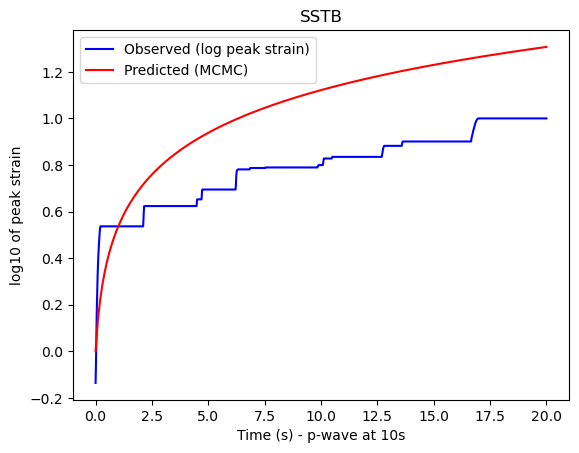

2018-02-04_M6.1


In [129]:
for ii in range(len(events)):
    
    evt_id = events['evt_id'][ii]
    print(evt_id)

    for idx in range(len(snr_array)):

        sta = snr_array['Sta'][idx]
        
        if evt_id == '2009-10-03_M6.1':
            hypdist = snr_array['2009_hyp_dist_km'][idx]
        elif evt_id == '2013-10-31_M6.3':
            hypdist = snr_array['2013_hyp_dist_km'][idx]
        elif evt_id == '2018-02-04_M6.1':
            hypdist = snr_array['2018_hyp_dist_km'][idx]
        
        int_hypdist = int(hypdist)

        # Figure out the bounds for the MCMC based on the event and hypocentral distance (rainbow plots)
        xlow = 10
        xhigh = 20 # For Taiwan
        
        if evt_id == '2013-10-31_M6.3' and sta == 'SSTB':
            pass
        else:
            continue
        
        pst = read(path + 'filtered_abs_peak_post_p/' + evt_id + '/' + sta + '.mseed')

        print('Processing ' + str(sta))
        
        starttime = pst[0].stats.starttime + xlow
        endtime = starttime + xhigh
        pst_trim = pst.trim(starttime = starttime, endtime = endtime, pad = True, fill_value = 0)

        times = pst_trim[0].times()
        data = pst_trim[0].data
        log10_data = np.log10(data)
        samp_rate = pst_trim[0].stats.sampling_rate

        xobserved = times
        yobserved = log10_data / max(log10_data)

        # In order to pass the x variable into the target function it needs to be converted to a Theano "shared" variable
        pt_xobserved = pytensor.shared(xobserved)

        # MCMC run parameters, these are good numbers for a "production" run. If you are fooling arund these can be lower to iterate faster
        Nburn = 5000 # burn in samples that get discarded
        Nmcmc = 15000 # bump to at least 5-10k - increase this after ficing the uniform part 
        Nchains = 4
        Ncores = 1

        # Define the Bayesian model
        with pm.Model() as model:
            
            # Priors for unknown model parameters
            V0 = pm.HalfNormal('V0', sigma = 5)
            tau = pm.HalfNormal('tau', sigma = 5)
            n = pm.HalfNormal('n', sigma = 50000)
            sigma = pm.HalfCauchy('sigma', beta = 10) # Observation error
            
            # Expected value of outcome - the function we're trying to fit
            mu = montesi11b(pt_xobserved, V0, tau, n) 
            # print(mu)

            # This is the model - likelihood (sampling distribution) of observations in dataset
            likelihood = pm.Normal('y', mu = mu, observed = yobserved, sigma = sigma) # Normal distribution with a mean that is the y_out array?

            # NUTS sampler (default) is gradient based and won't work, use metropolis
            step = pm.Metropolis(scaling = 0.1) # Check out Diego's book - condition for accepting new sample as "better" than last

            # This runs the MCMC sampler
            mcmc = pm.sample(Nmcmc, tune = Nburn, chains = Nchains, cores = Ncores, step = step)

        # Done, now is post-processing to get the data out of the sampler
        # posterior = az.extract(mcmc)
        xpredicted = np.arange(xobserved.min(), xobserved.max()+0.1, 0.1)
        
        V0 = az.summary(mcmc)['mean'][0]
        tau = az.summary(mcmc)['mean'][1]
        n = az.summary(mcmc)['mean'][2]
        
        ypredicted = V0 * tau * n * (1 - (1 + (1 - (1/n)) * xpredicted/tau)**(1/(1-n)))
        
        # Summary
        print(az.summary(mcmc, kind = 'stats'))

        # Plot all solutions
        fig = plt.figure(dpi = 100)
        ax = fig.add_subplot(111)
        ax.set_title(str(sta))

        ax.plot(xobserved, yobserved, color = 'blue', label = 'Observed (log peak strain)') # ----------------------
        ax.plot(xpredicted, ypredicted, color = 'red', label = 'Predicted (MCMC)') # ----------------------
        ax.set_xlabel('Time (s) - p-wave at 10s')
        ax.set_ylabel('log10 of peak strain')
        # ax.set_xlim(10,13)
        ax.legend()

        plt.show()



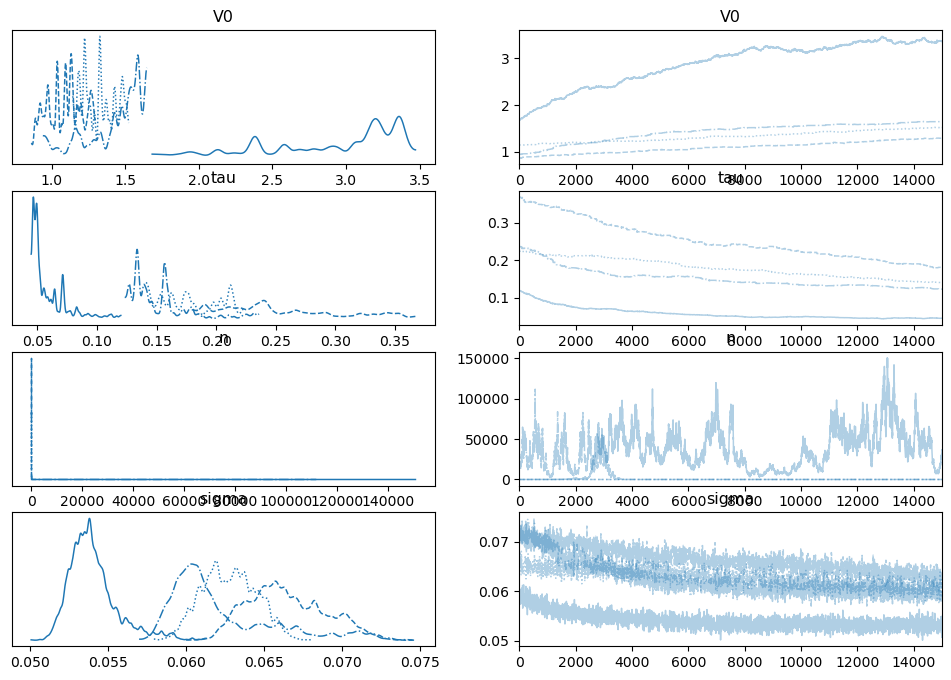

In [131]:
az.plot_trace(mcmc);

In [98]:
# Log function where time is divided by some time constant (Tau) and scaled with a constant (A) with a function that looks something like this?
# Strain = A*ln(time/Tau)

# Build the target function, misfit to this is what is being minimized
@as_op(itypes=[pt.dvector,pt.dscalar,pt.dscalar,pt.dscalar,pt.dscalar,pt.dscalar], otypes=[pt.dvector]) # input variable types and output variable type(s)
def two_straight_lines(x,m1,m2,xinter,x0,y0):
    '''
    input x coordiantes are in x
    slopes are m1 and m2
    intercept of left hand line is b1 
    intersection of two lines is at xinter
    
    Note that y intercept of second straight line is dependent on b1 and xinter
      and defined entirely by them (so that the lines touch).
    '''
    
    # Output vector
    y_out = np.ones(len(x))
    
    # Before building the first straight line, calculate the intercept
    b1 = y0 - m1*x0
    
    # Build first straight line segment
    y_out = m1*x + b1
    
    # Find points that are after the intersection and make the second segment
    i = np.where(x>xinter)[0]
    
    # Define second y intercept
    b2 = m1*xinter + b1 - m2*xinter
    # print(b2)
    
    # Make second straight line
    y_out[i] = m2*x[i] + b2

    return y_out

# Build the target function, misfit to this is what is being minimized
def non_pytensor_two_straight_lines(x,m1,m2,xinter,x0,y0):
    '''
    input x coordiantes are in x
    slopes are m1 and m2
    intercept of left hand line is b1 
    intersection of two lines is at xinter
    
    Note that y intercept of second straight line is dependent on b1 and xinter
      and defined entirely by them (so that the lines touch).
    '''
    
    # Output vector
    yout = np.ones(len(x))
    
    # Before building the first straight line, calculate the intercept
    b1 = y0 - m1*x0
    
    # Build first straight line segment
    yout = m1*x + b1
    
    # Find points that are after the intersection and make the second segment
    i = np.where(x>xinter)[0]
    
    # Define second y intercept
    b2 = m1*xinter + b1 - m2*xinter
    
    # Make second straight line
    yout[i] = m2*x[i] + b2

    return yout

In [27]:
path = '/Users/sydneydybing/StrainProject/2024/taiwan_strain_data/'
events = pd.read_csv(path + 'events_csv.csv')
snr_array = pd.read_csv(path + 'station_data_hypdists_snrs.csv')
snr_array

Sta      Lat       Lon  Depth(m)  2009_hyp_dist_km  2013_hyp_dist_km  \
0   BCWB  24.2184  121.6891      -192         69.496535         74.182696   
1   TRKB  24.1614  121.6127      -192         61.088805         65.767547   
2   NTTB  24.1728  121.5259      -175         60.587926         65.180780   
3   SJNB  24.1073  121.6006      -193         54.988063         59.668808   
4   HGSB  23.4903  121.4237      -266         15.739505         11.125139   
5   CHMB  23.4868  121.4703      -191         15.969342         11.924641   
6   SSNB  23.4423  121.3981      -185         21.504342         16.833483   
7   ZANB  23.3947  121.4585      -218         26.068219         21.740867   
8   FBRB  23.1406  121.2796      -200         56.994188         52.307853   
9   SSTB  23.1340  121.3782      -199         55.447392         50.858196   
10  DONB  22.9920  121.3124      -181         72.085844         67.442876   

    2018_hyp_dist_km snrs_2009      snrs_2013      snrs_2018  
0           7.066640         -              -              -  
1           9.697232         -  1152.20250487   3719.0718215  
2          18.587874         -              -              -  
3          12.226300         -  1534.07924347  130.500478359  
4          79.319331         -  439.289654937  372.018353576  
5          78.079695         -  348.253341927  40.3376474275  
6          85.224271         -  766.890947625  129.005945014  
7          88.175343         -  3295.27964074  106.461336916  
8         120.756809         -  410.300738921  80.3548941939  
9         118.191393         -  359.179515365  47.0870229521  
10        135.198262         -  88.6580819182              -

2009-10-03_M6.1
2013-10-31_M6.3
Processing SSTB


Sequential sampling (4 chains in 1 job)
CompoundStep
>Metropolis: [m1]
>Metropolis: [m2]
>Metropolis: [xinter]
>Metropolis: [sigma]


/Users/sydneydybing/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/pymc/step_methods/metropolis.py:285: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),


Sampling 4 chains for 3_000 tune and 9_000 draw iterations (12_000 + 36_000 draws total) took 64 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


         mean     sd  hdi_3%  hdi_97%
m1      1.269  2.137  -0.096    5.032
m2      0.169  0.069   0.095    0.281
xinter  2.728  4.446   0.003   10.426
sigma   0.281  0.128   0.150    0.506
m1 mean: 1.27
m2 mean: 0.17
xinter Mean: 2.73
x0: 10.0
y0: -0.42315007487110123
b1: -13.1146112142069
b2: 0.8925675238892858


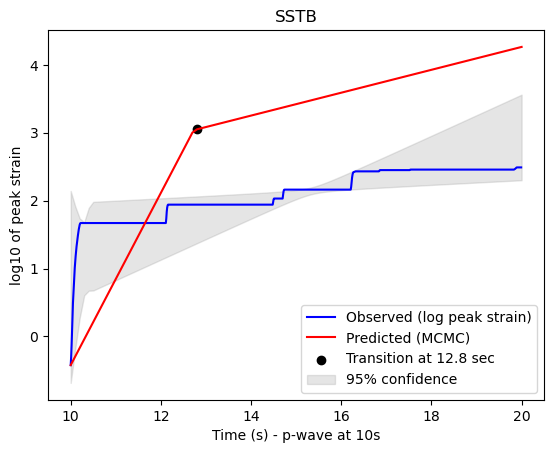

2018-02-04_M6.1


In [94]:
stas_list = []
hypdist_list = []
xhighs_list = []
m1s_list = []
m2s_list = []
xinters_list = []
sigmas_list = []
trans_time_list = []

counter = 0

for ii in range(len(events)):
    
    evt_id = events['evt_id'][ii]
    print(evt_id)

    for idx in range(len(snr_array)):

        sta = snr_array['Sta'][idx]
        
        if evt_id == '2009-10-03_M6.1':
            hypdist = snr_array['2009_hyp_dist_km'][idx]
        elif evt_id == '2013-10-31_M6.3':
            hypdist = snr_array['2013_hyp_dist_km'][idx]
        elif evt_id == '2018-02-04_M6.1':
            hypdist = snr_array['2018_hyp_dist_km'][idx]
        
        int_hypdist = int(hypdist)

        # Figure out the bounds for the MCMC based on the event and hypocentral distance (rainbow plots)
        xlow = 10
        xhigh = 20 # For Taiwan
        
        if evt_id == '2013-10-31_M6.3' and sta == 'SSTB':
            pass
        else:
            continue
        
        try:
            pst = read(path + 'filtered_abs_peak_post_p/' + evt_id + '/' + sta + '.mseed')
            counter += 1
        except:
            continue

        print('Processing ' + str(sta))

        times = pst[0].times()
        data = pst[0].data
        log10_data = np.log10(data)
        samp_rate = pst[0].stats.sampling_rate

        # Split into x and y vectors
        vec_start = int(xlow*samp_rate)
        vec_end = int(xhigh*samp_rate)
        xobserved = times[vec_start:vec_end]
        yobserved = log10_data[vec_start:vec_end]
        
        # Initial values (origin)
        x0 = xobserved[0]
        y0 = yobserved[0]

        # In order to pass the x variable into the target function it needs to be converted to a Theano "shared" variable
        pt_xobserved = pytensor.shared(xobserved)
        pt_x0 = pytensor.shared(x0)
        pt_y0 = pytensor.shared(y0)

        # MCMC run parameters, these are good numbers for a "production" run. If you are fooling arund these can be lower to iterate faster
        Nburn = 3000 # burn in samples that get discarded
        Nmcmc = 9000 # bump to at least 5-10k - increase this after ficing the uniform part 
        Nchains = 4
        Ncores = 1

        # Bounds for the prior distributions - expect this, but not enforce
        m1_low = 0 ; m1_high = 1000 # lowest slope 0, highest 10
        m2_low = 0 ; m2_high = 100
        # b1_low = -50 ; b1_high = 0 # lowest y-intercept -20, highest 0
        xinter_low = 10 ; xinter_high = 25 # location of the line slope change

        # Define the Bayesian model
        with pm.Model() as model:
            
            # Priors for unknown model parameters
            m1 = pm.Normal('m1', mu = 10, sigma = 3) # Could change mu (mean)
            m2 = pm.Normal('m2', mu = 0, sigma = 1)
            xinter = pm.HalfNormal('xinter', sigma = 1)
            sigma = pm.HalfNormal('sigma', sigma = 1) # Observation error
            
            # m1 = pm.Uniform('m1', lower = m1_low, upper = m1_high) # Random sampling, uninformative prior
            # m2 = pm.Uniform('m2', lower = m2_low, upper = m2_high)
            # xinter = pm.Uniform('xinter', lower = xinter_low, upper = xinter_high)
            # sigma = pm.HalfCauchy('sigma', beta = 10, initval = 1.) # Observation error
            
            # Expected value of outcome - the function we're trying to fit
            mu = two_straight_lines(pt_xobserved, m1, m2, xinter, pt_x0, pt_y0) 
            # print(mu)

            # This is the model - likelihood (sampling distribution) of observations in dataset
            likelihood = pm.Normal('y', mu = mu, observed = yobserved, sigma = sigma) # Normal distribution with a mean that is the y_out array?

            # NUTS sampler (default) is gradient based and won't work, use metropolis
            step = pm.Metropolis() # Check out Diego's book - condition for accepting new sample as "better" than last

            # This runs the MCMC sampler
            mcmc = pm.sample(Nmcmc, tune = Nburn, chains = Nchains, cores = Ncores, step = step)

        # Done, now is post-processing to get the data out of the sampler
        posterior = az.extract(mcmc)
        
        # Summary
        print(az.summary(mcmc, kind = 'stats'))

        # Unwrap coeficients - WRITE LINES TO SAVE THE ARRAYS!!!
        m1_array = posterior.m1.values
        m1 = np.mean(m1_array)
        print('m1 mean: ' + str(round(m1,2)))

        m2_array = posterior.m2.values
        m2 = np.mean(m2_array)
        print('m2 mean: ' + str(round(m2,2)))

        xinter_array = posterior.xinter.values
        xinter = np.mean(xinter_array)
        print('xinter Mean: ' + str(round(xinter,2)))

        sigma_array = posterior.sigma.values
        sigma = np.mean(sigma_array)

        # Lines!
        print('x0: ' + str(x0))
        print('y0: ' + str(y0))
        b1 = y0 - m1*x0
        b2 = m1*(xinter+10) + b1 - m2*(xinter+10)
        print('b1: ' + str(b1))
        print('b2: ' + str(b2))

        # Make plot to check stuff
        xpredicted = np.arange(xobserved.min(), xobserved.max()+0.1, 0.1)
        # print(xpredicted)
        # ypredicted = np.ones(len(xpredicted))
        ypredicted = m1*xpredicted + b1
        # print(ypredicted)
        i = np.where(xpredicted > xinter+10)[0]
        # print(i)
        ypredicted[i] = m2*xpredicted[i] + b2

        # Get one-sigma region (need to obtain a ton of forward models and get stats)
        N = len(posterior.m1.values)

        yfit = np.zeros((len(xpredicted), N))
        for k in range(N):
            yfit[:,k] = non_pytensor_two_straight_lines(xpredicted,m1_array[k],m2_array[k],xinter_array[k],x0,y0)
        mu = yfit.mean(1)
        sig = yfit.std(1) * 1.95 #for 95% confidence
        mu_plus = mu + sig
        mu_minus = mu - sig

        # Least squares
        mls, bls = np.polyfit(xobserved, yobserved, 1)

        # Find the transition point in ypredicted
        diff = np.round(np.diff(ypredicted), decimals = 5)
        # print(diff)
        first_slope = diff[0]
        # print(first_slope)
        second_slope = diff[-1]
        # print(second_slope)
        where1 = np.where((diff != first_slope) & (diff != second_slope))
        # print(where1)
        trans_idx = np.where((diff != first_slope) & (diff != second_slope))[0][0] + 1

        # Get the transition point
        mcmc_trans_x = xpredicted[trans_idx] # Number
        mcmc_trans_y = ypredicted[trans_idx]

        # Append things
        stas_list.append(sta)
        hypdist_list.append(int_hypdist)
        xhighs_list.append(xhigh)
        m1s_list.append(m1)
        m2s_list.append(m2)
        xinters_list.append(xinter)
        sigmas_list.append(sigma)
        trans_time_list.append(mcmc_trans_x)

        # Plot all solutions
        fig = plt.figure(dpi = 100)
        ax = fig.add_subplot(111)
        ax.set_title(str(sta))

        ax.plot(xobserved, yobserved, color = 'blue', label = 'Observed (log peak strain)') # ----------------------
        ax.plot(xpredicted, ypredicted, color = 'red', label = 'Predicted (MCMC)') # ----------------------
        # ax.plot(xpredicted, mu, color = 'green', linestyle = '--', label = 'yfit')
        # ax.plot(xpredicted, xpredicted * mls + bls, color = 'orange', label = 'np.polyfit least squares')
        ax.scatter(xpredicted[trans_idx], ypredicted[trans_idx], marker = 'o', color = 'black', label = 'Transition at ' + str(round(xpredicted[trans_idx],2)) + ' sec') # ----------------------
        # ax.scatter(closest_trans_x, closest_trans_y, marker = 'o', color = 'green', label = 'Adjusted transition at ' + str(round(closest_trans_x,2)) + ' sec')
        # ax2 = ax.twinx()
        # ax2.plot(xobserved, pythags_arr, color = 'violet')
        # ax2.axhline(closest_trans_x, color = 'violet', linestyle = '--')
        ax.fill_between(xpredicted, mu_plus, mu_minus, color = 'gray', alpha = 0.2, label = '95% confidence') # 95% confidence interval # ----------------------
        ax.set_xlabel('Time (s) - p-wave at 10s')
        ax.set_ylabel('log10 of peak strain')
        # ax.set_xlim(10,13)
        ax.legend()

        plt.show()

#         # Create folder for the event
#         array_save_dir = path + 'filtered_mcmc_arrays/' + str(sta) + '/'
#         if os.path.isdir(array_save_dir):
#             pass
#         else:
#             os.makedirs(array_save_dir)

#         # Save arrays
#         np.save(array_save_dir + 'xobserved.npy', xobserved)
#         np.save(array_save_dir + 'yobserved.npy', yobserved)
#         np.save(array_save_dir + 'xpredicted.npy', xpredicted)
#         np.save(array_save_dir + 'ypredicted.npy', ypredicted)
#         np.save(array_save_dir + 'forward_mus.npy', mu)
#         np.save(array_save_dir + 'foward_sigs.npy', sig)

#         # Save posterior
#         summary = az.summary(mcmc)
#         summary.to_csv(array_save_dir + 'summary.csv')
#         # posterior = az.extract(mcmc)
#         # posterior.to_netcdf(path = array_save_dir + 'posterior.nc', mode = 'w') # Doesn't work right now

#         # Save figure
#         fig_save_dir = path + 'figures/filtered_mcmc_plots/'
#         if os.path.isdir(fig_save_dir):
#             pass
#         else:
#             os.makedirs(fig_save_dir)

#         plt.savefig(fig_save_dir + sta + '.png', format = 'PNG', dpi = 400)
#         plt.close()

#         print(str(sta) + ' done')

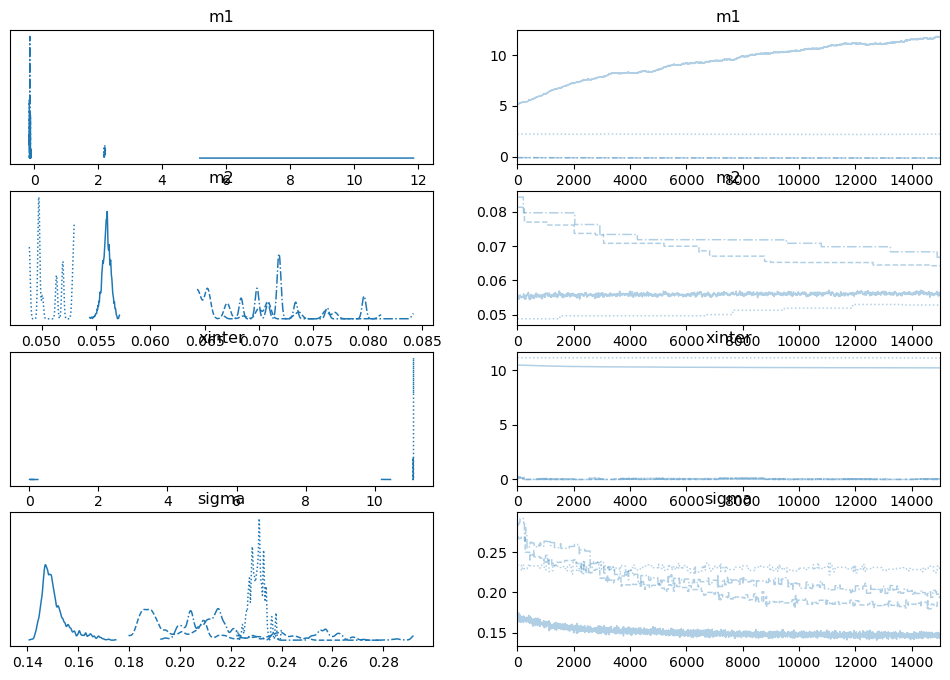

In [82]:
az.plot_trace(mcmc);

In [83]:
az.summary(mcmc)

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
m1      2.823  3.990  -0.154   11.006      1.981    1.516       4.0       6.0   
m2      0.062  0.009   0.049    0.076      0.005    0.004       4.0       5.0   
xinter  5.360  5.339   0.001   11.122      2.668    2.045       5.0      92.0   
sigma   0.201  0.034   0.143    0.241      0.016    0.012       5.0      12.0   

        r_hat  
m1       3.90  
m2       3.42  
xinter   2.81  
sigma    2.19

In [24]:
b1

-189.71811654340382

In [25]:
b2

69.53134320552547

In [ ]:
counter

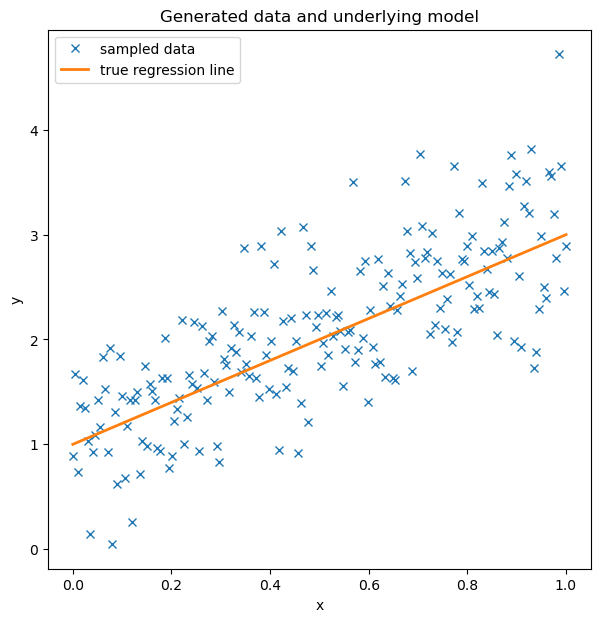

In [38]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + rng.normal(scale=0.5, size=size)

data = pd.DataFrame(dict(x=x, y=y))

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x, y, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0);

In [40]:
with pm.Model() as model:  # model specifications in PyMC are wrapped in a with-statement
    # Define priors
    sigma = pm.HalfCauchy("sigma", beta=10)
    intercept = pm.Normal("Intercept", 0, sigma=20)
    slope = pm.Normal("slope", 0, sigma=20)

    # Define likelihood
    likelihood = pm.Normal("y", mu=intercept + slope * x, sigma=sigma, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    idata = pm.sample(3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, slope]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 28 seconds.


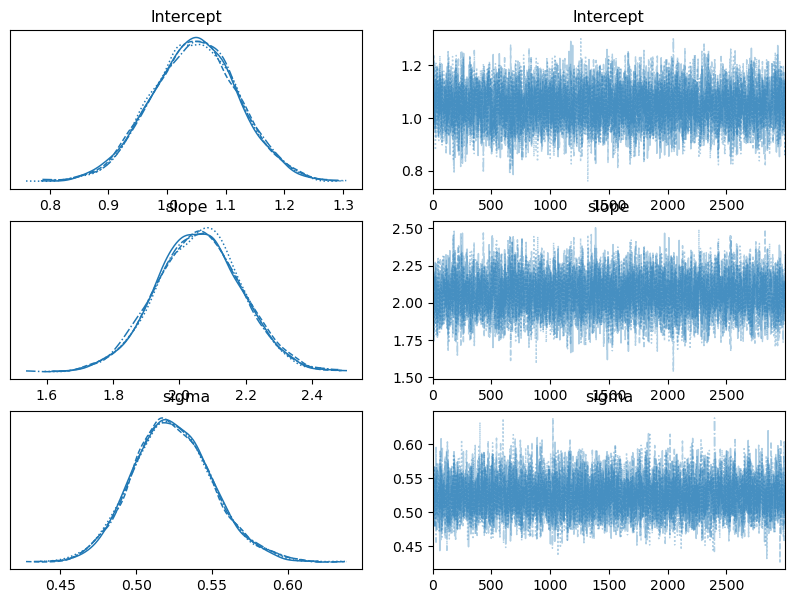

In [41]:
az.plot_trace(idata, figsize=(10, 7));

In [ ]:
mcmc_array = np.column_stack((np.array(events_list), np.array(mags_list), np.array(stas_list), np.array(hypdist_list),
                             np.array(xhighs_list), np.array(m1s_list), np.array(m2s_list), np.array(xinters_list),
                             np.array(sigmas_list), np.round(np.array(trans_time_list),2)))

np.save(path_to_files + 'filtered_mcmc_arrays/summary_array.npy', mcmc_array)

In [ ]:
mcmc_array.shape

In [ ]:
mcmc_array = np.load(path_to_files + 'filtered_mcmc_arrays/summary_array.npy')
mcmc_array[0]

# Columns:
# 0. Event name
# 1. Magnitude
# 2. Station name
# 3. Hypocentral distance (km)
# 4. xhigh
# 5. m1 slope
# 6. m2 slope
# 7. intersection point
# 8. sigma
# 9. transition time

In [ ]:
# Calculate earthquake source durations

# Get M0 from Mw, then use relation in Melgar and Hayes, 2017 to get duration

mags_for_relation = np.arange(6,7.25,0.05)
# print(mags_for_dur)

# Preferred params for source duration
apref_sd = -6.407
bpref_sd = 0.385

apref_rt = -5.323
bpref_rt = 0.293

source_durs = []
rise_times = []

for Mw in mags_for_relation:
    
    M0 = 10**(1.5*Mw + 9.05)
    # print(M0)
    
    log_sd = apref_sd + bpref_sd * np.log10(M0)
    source_dur = 10**log_sd
    source_durs.append(source_dur)
    
    log_rt = apref_rt + bpref_rt * np.log10(M0)
    rise_time = 10**log_rt
    rise_times.append(rise_time)
    

In [ ]:
# Get mean transition time by event

unique_eventids = np.unique(mcmc_array[:,0])
unique_eventids

mags = []
mean_trans_times = []

for uni_id in unique_eventids:
    
    print(uni_id)
    i = np.where(uni_id == mcmc_array[:,0])[0]
    # print(i)
    
    trans_times = mcmc_array[i,9].astype(float)-10
    mag = mcmc_array[i,1].astype(float)[0]
    # print(mags)
    print(trans_times)
    
    mean_trans_time = np.mean(trans_times)
    # print(mean_trans_time)
    
    mags.append(mag)
    mean_trans_times.append(mean_trans_time)
    
mags = np.array(mags)
mean_trans_times = np.array(mean_trans_times)

In [ ]:
m, b = np.polyfit(mags, np.log10(mean_trans_times), 1)
ma, ba = np.polyfit(mcmc_array[:,1].astype(float), np.log10(mcmc_array[:,9].astype(float)-10), 1)

In [ ]:
# plt.scatter(mcmc_array[:,3].astype(float), mcmc_array[:,9].astype(float)-10)
# plt.xlabel('Hypocentral distance (km)')
# plt.ylabel('Transition time (s)')
# plt.show()



plt.scatter(mcmc_array[:,1].astype(float), np.log10(mcmc_array[:,9].astype(float)-10))
plt.scatter(mags, np.log10(mean_trans_times), marker = '+', color = 'red', label = 'Mean transition time by event')
plt.plot(mags, mags * m + b, color = 'red', lw = 1)
plt.plot(mcmc_array[:,1].astype(float), mcmc_array[:,1].astype(float) * ma + ba, color = 'C0', lw = 1)
plt.plot(mags_for_relation, np.log10(source_durs), color = 'lime', label = 'Source duration scaling')
plt.plot(mags_for_relation, np.log10(rise_times), color = 'turquoise', label = 'Rise time scaling')
plt.xlabel('Earthquake magnitude')
plt.ylabel('Log10 of transition time (s)')
# plt.semilogy()
plt.legend()
plt.show()

plt.scatter(mcmc_array[:,1].astype(float), mcmc_array[:,5].astype(float))
plt.xlabel('Earthquake magnitude')
plt.ylabel('Line 1 slope')
plt.show()

plt.scatter(mcmc_array[:,1].astype(float), mcmc_array[:,6].astype(float))
plt.xlabel('Earthquake magnitude')
plt.ylabel('Line 2 slope')
plt.show()

In [ ]:
# mcmc_array = np.column_stack((np.array(events_list), np.array(mags_list), np.array(stas_list), np.array(hypdist_list),
#                              np.array(xhighs_list), np.array(m1s_list), np.array(m2s_list), np.array(xinters_list),
#                              np.array(sigmas_list), np.array(trans_time_list)))

pd_mcmc = pd.DataFrame(mcmc_array, columns = ['eq_id', 'mag', 'sta', 'hypdist', 'xhigh', 'm1', 'm2', 'xinter', 'sigma', 'trans_time'])
pd_mcmc.to_csv(path_to_files + 'filtered_mcmc_arrays/mcmc_results_summary.csv', index = False)

In [ ]:
# Figure out the "good" and "bad" performing waveforms using an L2 norm

mcmc_results = pd.read_csv(path_to_files + 'filtered_mcmc_arrays/mcmc_results_summary.csv')
mcmc_results

eq_id  mag   sta  hypdist  xhigh        m1        m2  \
0      2023-04-13_M6  6.0  B012      299     60  0.237385  0.014034   
1      2023-04-13_M6  6.0  B927      349     60  0.520998  0.006502   
2      2023-04-13_M6  6.0  B928      330     60  0.473223  0.010361   
3    2022-12-20_M6.4  6.4  B030      406     40  0.169725  0.031976   
4    2022-12-20_M6.4  6.4  B032      359     40  0.143660  0.033170   
..               ...  ...   ...      ...    ...       ...       ...   
195  2010-01-10_M6.5  6.5  B035      232     35  0.519965  0.025339   
196  2010-01-10_M6.5  6.5  B036      233     35  0.515825  0.026782   
197  2010-01-10_M6.5  6.5  B057      344     35  0.123378  0.020024   
198  2010-01-10_M6.5  6.5  B933       89     35  0.740438  0.048036   
199  2010-01-10_M6.5  6.5  B935       96     35  0.880834  0.023594   

        xinter     sigma  trans_time  
0    13.037766  0.106723        13.1  
1    13.746085  0.151608        13.8  
2    12.366934  0.085590        12.4  
3    13.733588  0.111113        13.8  
4    14.465866  0.101163        14.5  
..         ...       ...         ...  
195  13.499214  0.170624        13.5  
196  13.503401  0.170778        13.6  
197  15.241258  0.067794        15.3  
198  13.192635  0.155758        13.2  
199  12.761871  0.150690        12.8  

[200 rows x 10 columns]

In [31]:
# mcmc_results_class_by_eye = pd.read_csv(path_to_files + 'mcmc_results_summary.csv', usecols = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
# mcmc_results_class_by_eye

eq_id  mag   sta  hypdist  xhigh        m1        m2  \
0      2023-04-13_M6  6.0  B003      423     60  0.276567  0.012251   
1      2023-04-13_M6  6.0  B004      398     60  0.523278  0.010967   
2      2023-04-13_M6  6.0  B005      468     60  0.392836  0.009337   
3      2023-04-13_M6  6.0  B009      456     60  0.428682  0.000518   
4      2023-04-13_M6  6.0  B012      299     60  0.420404  0.013704   
..               ...  ...   ...      ...    ...       ...       ...   
321  2010-01-10_M6.5  6.5  B066      499     35  0.228458  0.026041   
322  2010-01-10_M6.5  6.5  B933       89     35  1.205989  0.046212   
323  2010-01-10_M6.5  6.5  B934      123     35  0.258354  0.063122   
324  2010-01-10_M6.5  6.5  B935       96     35  1.338175  0.021897   
325  2008-01-10_M6.3  6.3  B026      321     24  0.442317  0.052398   

        xinter     sigma  trans_time behavior  
0    14.075615  0.141517        14.1        b  
1    12.877702  0.101206        12.9        g  
2    12.057298  0.075473        12.1        g  
3    12.471551  0.079256        12.5        g  
4    13.220529  0.112984        13.3        g  
..         ...       ...         ...      ...  
321  15.608228  0.096790        15.7        g  
322  12.710480  0.220511        12.8        g  
323  12.957077  0.087686        13.0        b  
324  12.540953  0.210012        12.6        g  
325  11.868874  0.089392        11.9        b  

[326 rows x 11 columns]

In [41]:
# good_results = mcmc_results_class_by_eye[mcmc_results_class_by_eye['behavior'] == 'g']
# bad_results = mcmc_results_class_by_eye[mcmc_results_class_by_eye['behavior'] == 'b']
# good_results

eq_id  mag   sta  hypdist  xhigh        m1        m2  \
1      2023-04-13_M6  6.0  B004      398     60  0.523278  0.010967   
2      2023-04-13_M6  6.0  B005      468     60  0.392836  0.009337   
3      2023-04-13_M6  6.0  B009      456     60  0.428682  0.000518   
4      2023-04-13_M6  6.0  B012      299     60  0.420404  0.013704   
5      2023-04-13_M6  6.0  B927      349     60  0.644048  0.006067   
..               ...  ...   ...      ...    ...       ...       ...   
319  2010-01-10_M6.5  6.5  B054      377     35  0.474619  0.001973   
320  2010-01-10_M6.5  6.5  B057      344     35  0.379983  0.023154   
321  2010-01-10_M6.5  6.5  B066      499     35  0.228458  0.026041   
322  2010-01-10_M6.5  6.5  B933       89     35  1.205989  0.046212   
324  2010-01-10_M6.5  6.5  B935       96     35  1.338175  0.021897   

        xinter     sigma  trans_time behavior  
1    12.877702  0.101206        12.9        g  
2    12.057298  0.075473        12.1        g  
3    12.471551  0.079256        12.5        g  
4    13.220529  0.112984        13.3        g  
5    12.064490  0.108054        12.1        g  
..         ...       ...         ...      ...  
319  13.653904  0.078392        13.7        g  
320  14.384422  0.117667        14.4        g  
321  15.608228  0.096790        15.7        g  
322  12.710480  0.220511        12.8        g  
324  12.540953  0.210012        12.6        g  

[210 rows x 11 columns]

In [51]:
# plt.figure(dpi = 400)
# plt.scatter(bad_results.hypdist.values, bad_results.xinter.values, marker = 'x', color = '#E9072B', label = '"Poorly-behaved" waveforms')
# plt.scatter(good_results.hypdist.values, good_results.xinter.values, marker = 'o', color = '#355464', alpha = 0.6, label = '"Well-behaved" waveforms')
# plt.xlabel('Hypocentral distance (km)')
# plt.ylabel('Transition time (s)')
# plt.legend()
# # plt.show()
# plt.savefig(path_to_files + 'figures/filtered_mcmc_plots/summary_hypdist_vs_transtime.png', format = 'PNG')
# plt.close()

# plt.figure(dpi = 400)
# plt.scatter(bad_results.mag.values, bad_results.xinter.values, marker = 'x', color = '#E9072B', label = '"Poorly-behaved" waveforms')
# plt.scatter(good_results.mag.values, good_results.xinter.values, marker = 'o', color = '#355464', alpha = 0.6, label = '"Well-behaved" waveforms')
# plt.xlabel('Earthquake magnitude')
# plt.ylabel('Transition time (s)')
# plt.legend()
# # plt.show()
# plt.savefig(path_to_files + 'figures/filtered_mcmc_plots/summary_mag_vs_transtime.png', format = 'PNG')
# plt.close()

# plt.figure(dpi = 400)
# plt.scatter(bad_results.mag.values, bad_results.m1.values, marker = 'x', color = '#E9072B', label = '"Poorly-behaved" waveforms')
# plt.scatter(good_results.mag.values, good_results.m1.values, marker = 'o', color = '#355464', alpha = 0.6, label = '"Well-behaved" waveforms')
# plt.xlabel('Earthquake magnitude')
# plt.ylabel('Line 1 slope')
# plt.legend()
# # plt.show()
# plt.savefig(path_to_files + 'figures/filtered_mcmc_plots/summary_mag_vs_m1.png', format = 'PNG')
# plt.close()

# plt.figure(dpi = 400)
# plt.scatter(bad_results.mag.values, bad_results.m2.values, marker = 'x', color = '#E9072B', label = '"Poorly-behaved" waveforms')
# plt.scatter(good_results.mag.values, good_results.m2.values, marker = 'o', color = '#355464', alpha = 0.6, label = '"Well-behaved" waveforms')
# plt.xlabel('Earthquake magnitude')
# plt.ylabel('Line 2 slope')
# plt.legend()
# # plt.show()
# plt.savefig(path_to_files + 'figures/filtered_mcmc_plots/summary_mag_vs_m2.png', format = 'PNG')
# plt.close()

In [93]:
summary = az.summary(mcmc)

In [94]:
summary

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
m1       1.608  0.390   1.130    2.124      0.274    0.231       2.0   
m2       0.013  0.003   0.011    0.019      0.002    0.001       3.0   
xinter  11.131  0.335  10.699   11.574      0.235    0.198       2.0   
sigma    0.106  0.037   0.067    0.177      0.024    0.020       2.0   

        ess_tail  r_hat  
m1          11.0   2.84  
m2          21.0   2.24  
xinter      10.0   2.69  
sigma       13.0   2.32

In [77]:
summary['mean']

m1         0.302
m2         0.039
xinter    12.971
sigma      0.163
Name: mean, dtype: float64

In [82]:
m1 = summary['mean'].iloc[0]
m2 = summary['mean'].iloc[1]
xinter = summary['mean'].iloc[2]
sigma = summary['mean'].iloc[3]

In [85]:
print(sigma)

0.163


In [87]:
# Done, now is post-processing to get the data out of the sampler

summary = az.summary(mcmc)

# Unwrap coeficients
m1 = summary['mean'].iloc[0]
m2 = summary['mean'].iloc[1]
xinter = summary['mean'].iloc[2]
sigma = summary['mean'].iloc[3]
b1 = y0 - m1*x0
b2 = m1*xinter + b1 - m2*xinter

In [88]:
# Make plot to check stuff
xpredicted = np.arange(xobserved.min(), xobserved.max()+0.1, 0.1)
ypredicted = np.ones(len(xpredicted))
ypredicted = m1*xpredicted + b1
i = np.where(xpredicted > xinter)[0]
ypredicted[i] = m2*xpredicted[i] + b2

In [90]:
posterior = az.extract(mcmc)

In [95]:
posterior

<xarray.Dataset> Size: 224kB
Dimensions:  (sample: 4000)
Coordinates:
  * sample   (sample) object 32kB MultiIndex
  * chain    (sample) int64 32kB 0 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1 1 1
  * draw     (sample) int64 32kB 0 1 2 3 4 5 6 ... 1994 1995 1996 1997 1998 1999
Data variables:
    m1       (sample) float64 32kB 0.2794 0.2794 0.2794 ... 0.3114 0.3114 0.3114
    m2       (sample) float64 32kB 0.0466 0.0466 0.0466 ... 0.04077 0.04077
    xinter   (sample) float64 32kB 12.98 12.98 12.99 12.99 ... 12.95 12.94 12.94
    sigma    (sample) float64 32kB 0.1522 0.1522 0.1522 ... 0.1575 0.1575 0.1575
Attributes:
    created_at:                 2024-03-05T10:45:23.481163
    arviz_version:              0.17.0
    inference_library:          pymc
    inference_library_version:  5.10.4
    sampling_time:              8.208245038986206
    tuning_steps:               1000

In [99]:
len(posterior.m1.values)

4000